# Bike Sharing Case-study

### PROBLEM  STATEMENT

- BoomBikes aspires to understand the demand for shared bikes among the people
- Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market.
- The company wants to know:
     - Which variables are significant in predicting the demand for shared bikes
     - How well those variables describe the bike demands

- We are required to model the demand for shared bikes with the available independent variables.
- It will be used by the management to understand how exactly the demands vary with different features

In [1]:
import calendar

import numpy as np
import pandas as pd

import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score, max_error
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv("day.csv")
df.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        6           0   
1        2  02-01-2018       1   0     1        0        0           0   
2        3  03-01-2018       1   0     1        0        1           1   
3        4  04-01-2018       1   0     1        0        2           1   
4        5  05-01-2018       1   0     1        0        3           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [4]:
df.describe()

instant      season          yr        mnth     holiday     weekday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean   365.500000    2.498630    0.500000    6.526027    0.028767    2.997260   
std    210.877136    1.110184    0.500343    3.450215    0.167266    2.006161   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.250000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    365.500000    3.000000    0.500000    7.000000    0.000000    3.000000   
75%    547.750000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    730.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.683562    1.394521   20.319259   23.726322   62.765175   12.763620   
std      0.465405    0.544807    7.506729    8.150308   14.237589    5.195841   
min      0.000000    1.000000    2.424346    3.953480    0.000000    1.500244   
25%      0.000000    1.000000   13.811885   16.889713   52.000000    9.041650   
50%      1.000000    1.000000   20.465826   24.368225   62.625000   12.125325   
75%      1.000000    2.000000   26.880615   30.445775   72.989575   15.625589   
max      1.000000    3.000000   35.328347   42.044800   97.250000   34.000021   

            casual   registered          cnt  
count   730.000000   730.000000   730.000000  
mean    849.249315  3658.757534  4508.006849  
std     686.479875  1559.758728  1936.011647  
min       2.000000    20.000000    22.000000  
25%     316.250000  2502.250000  3169.750000  
50%     717.000000  3664.500000  4548.500000  
75%    1096.500000  4783.250000  5966.000000  
max    3410.000000  6946.000000  8714.000000

In [5]:
df.shape

(730, 16)

In [6]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
df.nunique()

instant       730
dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

In [8]:
df['instant'].value_counts().max()

1

In [9]:
# instant used as index => unique values
df.drop('instant', axis=1, inplace=True)

In [10]:
df.rename(columns={'yr':'year', 'mnth':'month', 'hum': 'humidity', 'cnt': 'total_count', 'weathersit':'weather'}, inplace=True)

In [11]:
df.describe()

season        year       month     holiday     weekday  workingday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     2.498630    0.500000    6.526027    0.028767    2.997260    0.683562   
std      1.110184    0.500343    3.450215    0.167266    2.006161    0.465405   
min      1.000000    0.000000    1.000000    0.000000    0.000000    0.000000   
25%      2.000000    0.000000    4.000000    0.000000    1.000000    0.000000   
50%      3.000000    0.500000    7.000000    0.000000    3.000000    1.000000   
75%      3.000000    1.000000   10.000000    0.000000    5.000000    1.000000   
max      4.000000    1.000000   12.000000    1.000000    6.000000    1.000000   

          weather        temp       atemp    humidity   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     1.394521   20.319259   23.726322   62.765175   12.763620   
std      0.544807    7.506729    8.150308   14.237589    5.195841   
min      1.000000    2.424346    3.953480    0.000000    1.500244   
25%      1.000000   13.811885   16.889713   52.000000    9.041650   
50%      1.000000   20.465826   24.368225   62.625000   12.125325   
75%      2.000000   26.880615   30.445775   72.989575   15.625589   
max      3.000000   35.328347   42.044800   97.250000   34.000021   

            casual   registered  total_count  
count   730.000000   730.000000   730.000000  
mean    849.249315  3658.757534  4508.006849  
std     686.479875  1559.758728  1936.011647  
min       2.000000    20.000000    22.000000  
25%     316.250000  2502.250000  3169.750000  
50%     717.000000  3664.500000  4548.500000  
75%    1096.500000  4783.250000  5966.000000  
max    3410.000000  6946.000000  8714.000000

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   dteday       730 non-null    object 
 1   season       730 non-null    int64  
 2   year         730 non-null    int64  
 3   month        730 non-null    int64  
 4   holiday      730 non-null    int64  
 5   weekday      730 non-null    int64  
 6   workingday   730 non-null    int64  
 7   weather      730 non-null    int64  
 8   temp         730 non-null    float64
 9   atemp        730 non-null    float64
 10  humidity     730 non-null    float64
 11  windspeed    730 non-null    float64
 12  casual       730 non-null    int64  
 13  registered   730 non-null    int64  
 14  total_count  730 non-null    int64  
dtypes: float64(4), int64(10), object(1)
memory usage: 85.7+ KB


In [13]:
# temperature

In [14]:
# temp has good positive correlation with total_count (target variable)

In [15]:
df['temp'].quantile([0.1,0.25,0.4,0.5,0.8,0.9,0.95,0.98,1.0])

0.10    10.653165
0.25    13.811885
0.40    17.547992
0.50    20.465826
0.80    28.125992
0.90    29.998347
0.95    31.520460
0.98    32.999536
1.00    35.328347
Name: temp, dtype: float64

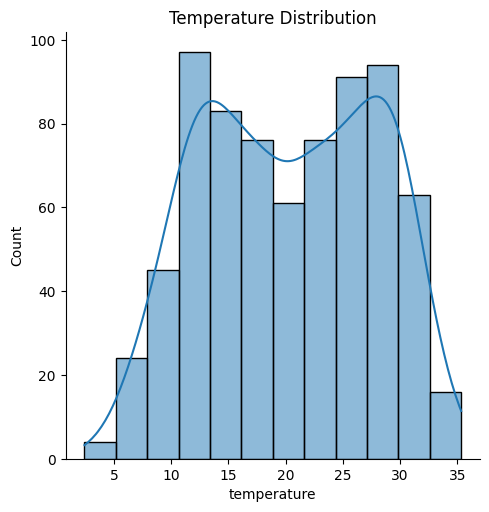

In [16]:
sns.displot(df['temp'], kde=True)
plt.title('Temperature Distribution')
plt.xlabel('temperature')
plt.show()

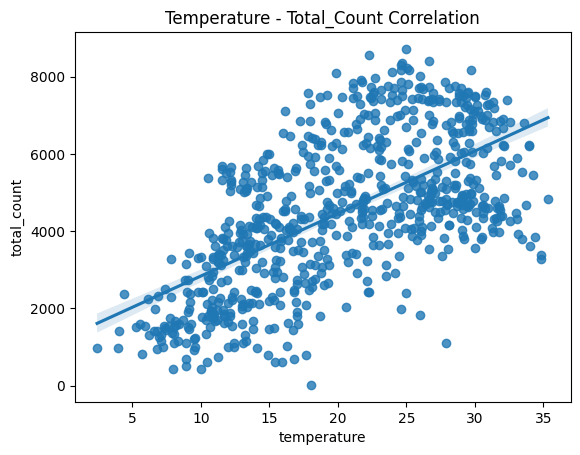

In [17]:
sns.regplot(df, x='temp', y='total_count')
plt.title('Temperature - Total_Count Correlation')
plt.xlabel('temperature')
plt.show()

In [18]:
# atemp

In [19]:
# temp and atemp are 99% positively correlated

In [20]:
df['atemp'].quantile([0.1,0.25,0.4,0.5,0.8,0.9,0.95,0.98,1.0])

0.10    12.752280
0.25    16.889713
0.40    21.274600
0.50    24.368225
0.80    31.881620
0.90    33.908210
0.95    35.749975
0.98    37.440100
1.00    42.044800
Name: atemp, dtype: float64

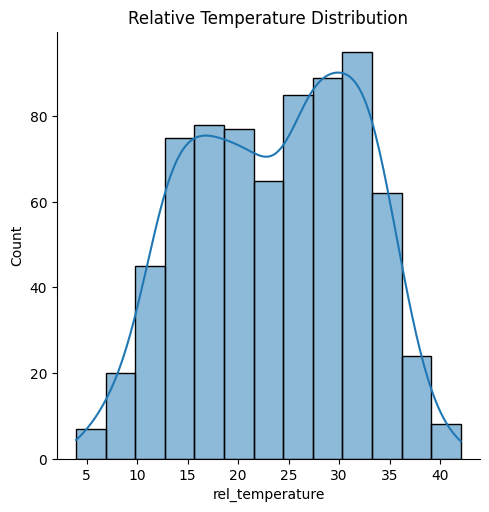

In [21]:
sns.displot(df['atemp'], kde=True)
plt.title('Relative Temperature Distribution')
plt.xlabel('rel_temperature')
plt.show()

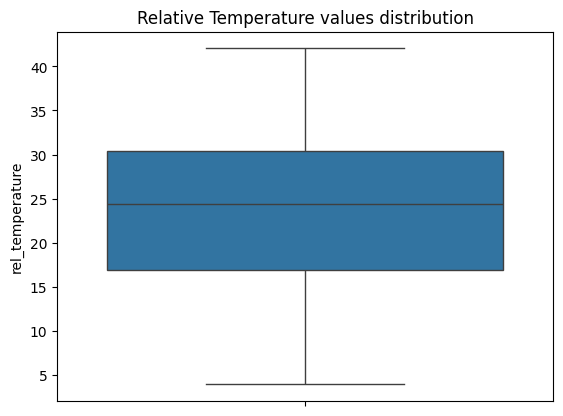

In [22]:
sns.boxplot(df['atemp'])
plt.title('Relative Temperature values distribution')
plt.ylabel('rel_temperature')
plt.show()

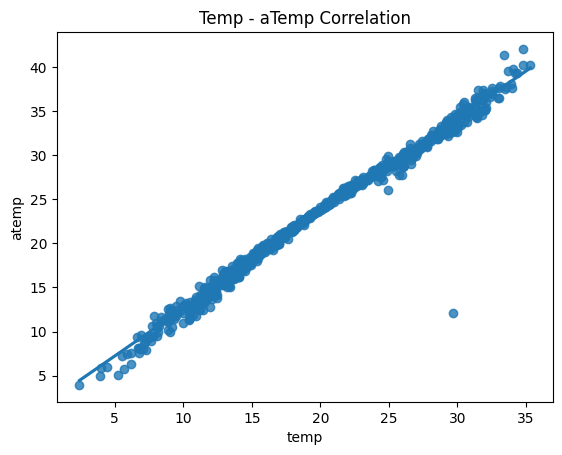

In [23]:
sns.regplot(df, x='temp', y='atemp')
plt.title('Temp - aTemp Correlation')
plt.show()

In [24]:
df[['temp', 'atemp']].corr()

temp     atemp
temp   1.000000  0.991696
atemp  0.991696  1.000000

In [25]:
# Humidity

In [26]:
# humidity has two outliers
# As 0 humidity is not possible and all the valid data is above 20, only those rows are selected
# choosing a even 0.01 quantile would remove valid data as well
# humidity is slightly negative correlated with total_count (target variable)

In [27]:
df['humidity'].quantile([0,0.01,0.1,0.25,0.4,0.5,0.8,0.9,0.95,0.98,1.0])

0.00     0.000000
0.01    31.209593
0.10    45.000000
0.25    52.000000
0.40    58.513020
0.50    62.625000
0.80    75.291700
0.90    81.762500
0.95    86.868735
0.98    90.830814
1.00    97.250000
Name: humidity, dtype: float64

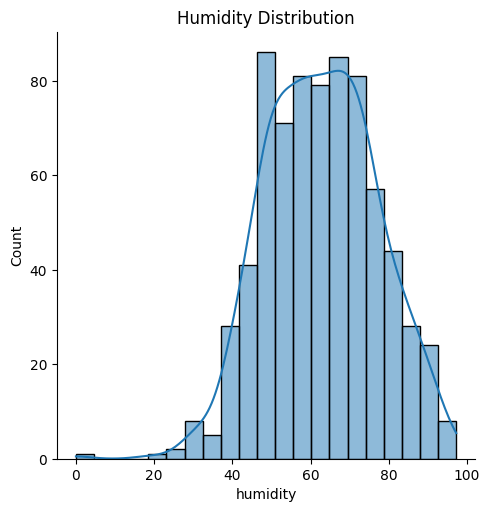

In [28]:
sns.displot(df['humidity'], kde=True)
plt.title('Humidity Distribution')
plt.show()

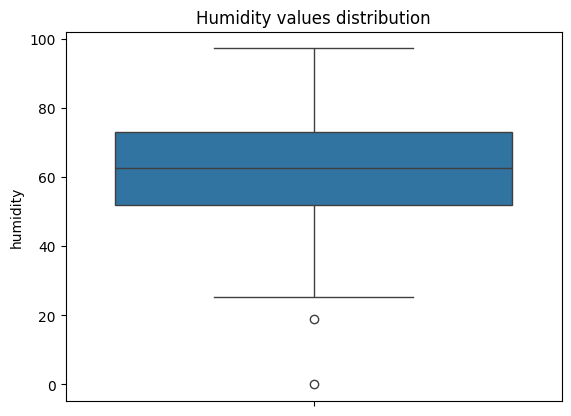

In [29]:
sns.boxplot(df['humidity'])
plt.title('Humidity values distribution')
plt.show()

In [30]:
# Removing outliers as 0 humidity is not possible on earth
df1 = df[df['humidity'] > 20]

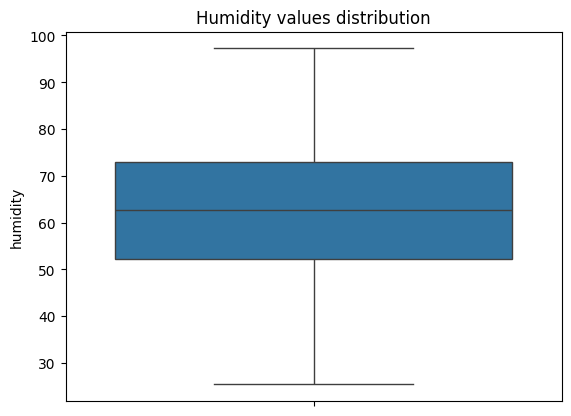

In [31]:
sns.boxplot(df1['humidity'])
plt.title('Humidity values distribution')
plt.show()

In [32]:
df1.shape

(728, 15)

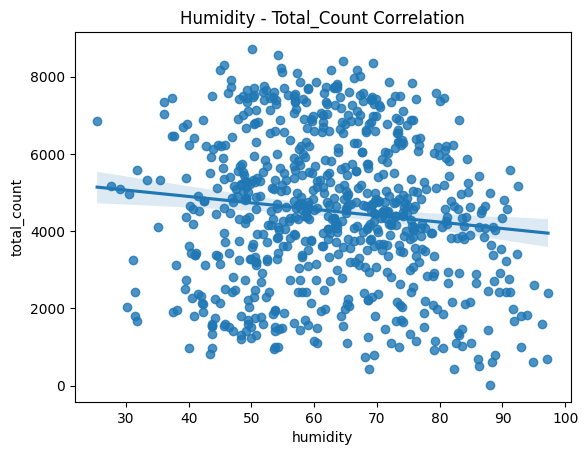

In [33]:
sns.regplot(df1, x='humidity', y='total_count')
plt.title('Humidity - Total_Count Correlation')
plt.show()

In [34]:
# Windspeed

In [35]:
# windspeed is highly negative correlated with total_count (target variable)

In [36]:
df1['windspeed'].quantile([0,0.01,0.1,0.25,0.4,0.5,0.8,0.9,1.0])

0.00     1.500244
0.01     3.548534
0.10     6.696439
0.25     9.031466
0.40    10.916833
0.50    12.125057
0.80    16.609193
0.90    19.804443
1.00    29.584721
Name: windspeed, dtype: float64

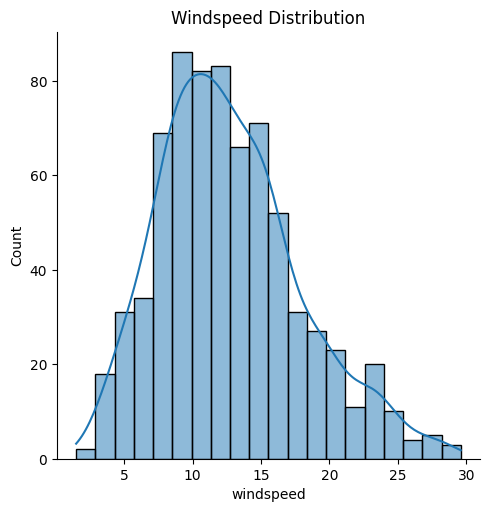

In [37]:
sns.displot(df1['windspeed'], kde=True)
plt.title('Windspeed Distribution')
plt.show()

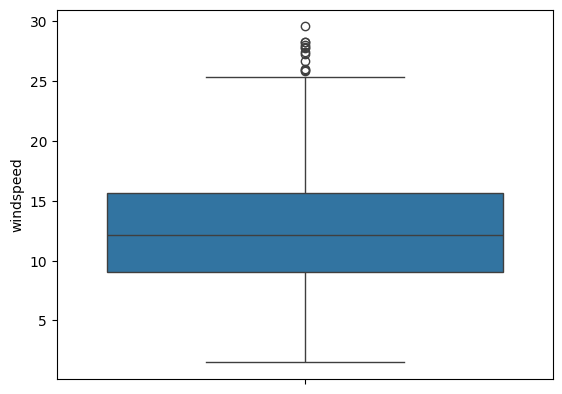

In [38]:
sns.boxplot(df1['windspeed'])
plt.show()

In [39]:
df1.shape

(728, 15)

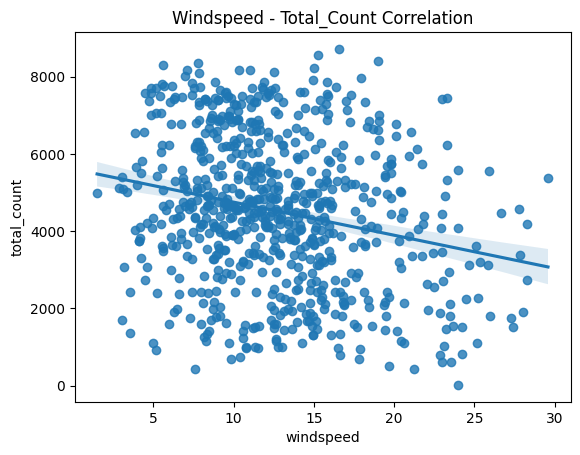

In [40]:
sns.regplot(df1, x='windspeed', y='total_count')
plt.title('Windspeed - Total_Count Correlation')
plt.show()

In [41]:
df2 = df1.copy()

In [42]:
# Season

In [43]:
# total number of people renting the bikes increasing from spring till fall
# and decrease from end of fall with spring being the lowest

In [44]:
df2['season'].unique()

array([1, 2, 3, 4], dtype=int64)

In [45]:
df2.loc[:, 'season'] = df2['season'].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

In [46]:
df2['season'].unique()

array(['spring', 'summer', 'fall', 'winter'], dtype=object)

In [47]:
df2.head()

dteday  season  year  month  holiday  weekday  workingday  weather  \
0  01-01-2018  spring     0      1        0        6           0        2   
1  02-01-2018  spring     0      1        0        0           0        2   
2  03-01-2018  spring     0      1        0        1           1        1   
3  04-01-2018  spring     0      1        0        2           1        1   
4  05-01-2018  spring     0      1        0        3           1        1   

        temp     atemp  humidity  windspeed  casual  registered  total_count  
0  14.110847  18.18125   80.5833  10.749882     331         654          985  
1  14.902598  17.68695   69.6087  16.652113     131         670          801  
2   8.050924   9.47025   43.7273  16.636703     120        1229         1349  
3   8.200000  10.60610   59.0435  10.739832     108        1454         1562  
4   9.305237  11.46350   43.6957  12.522300      82        1518         1600

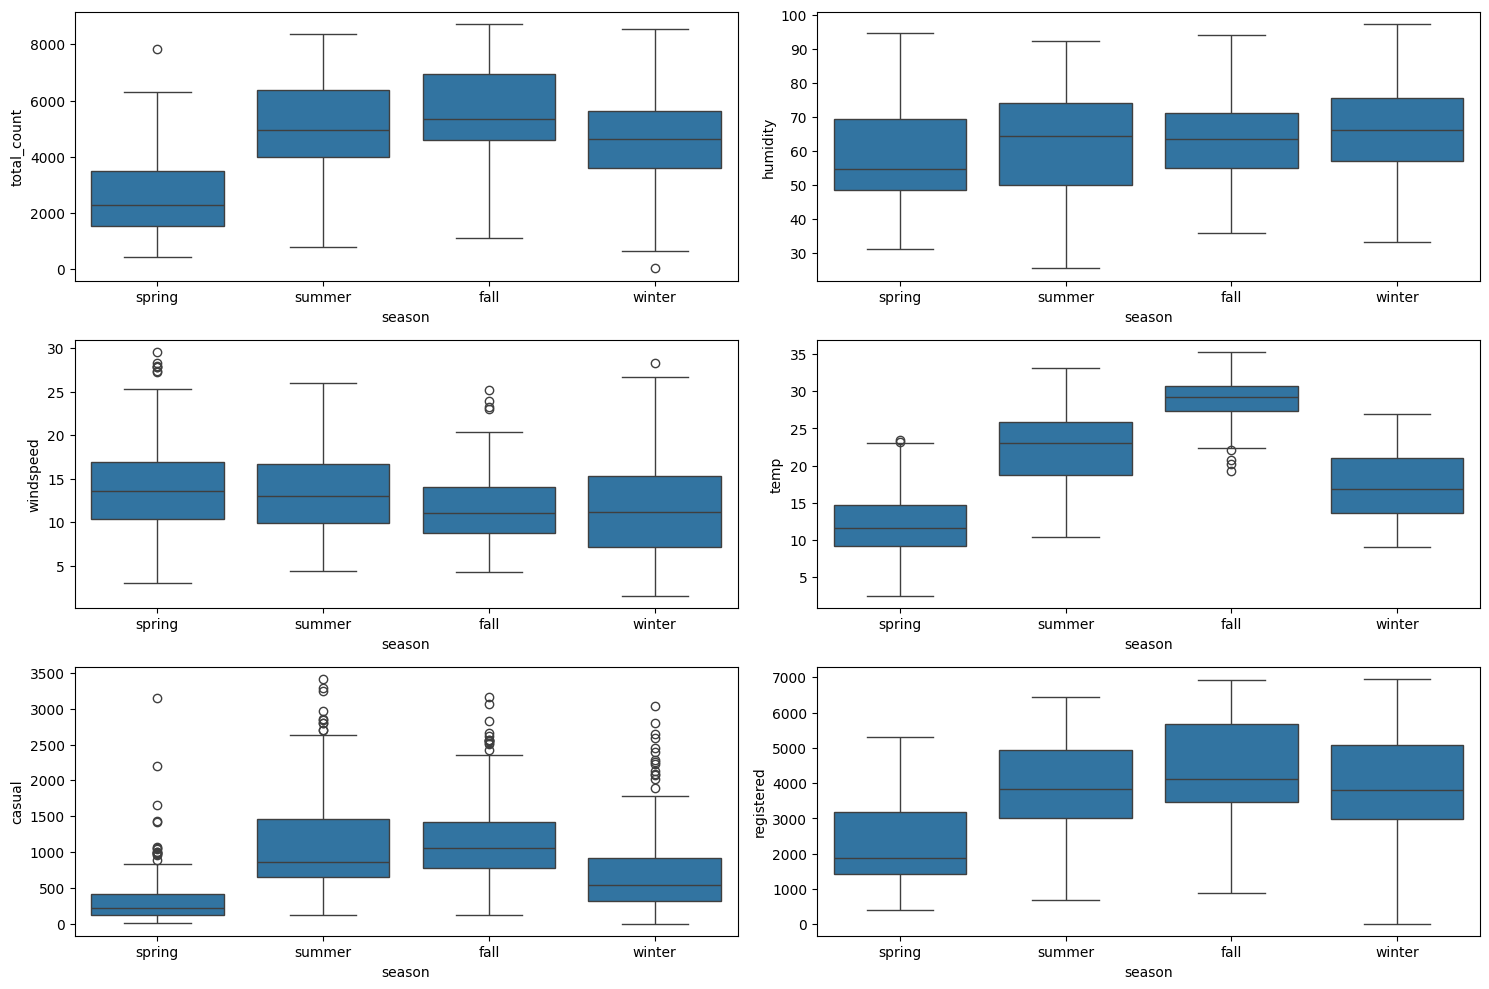

In [48]:
fig, axis = plt.subplots(3, 2, figsize=(15,10))
sns.boxplot(ax=axis[0,0], x=df2['season'], y=df2['total_count'])
sns.boxplot(ax=axis[0,1], x=df2['season'], y=df2['humidity'])
sns.boxplot(ax=axis[1,0], x=df2['season'], y=df2['windspeed'])
sns.boxplot(ax=axis[1,1], x=df2['season'], y=df2['temp'])
sns.boxplot(ax=axis[2,0], x=df2['season'], y=df2['casual'])
sns.boxplot(ax=axis[2,1], x=df2['season'], y=df2['registered'])
fig.tight_layout()
plt.show()

In [49]:
# Year

In [50]:
# number of users for bikes has increased significantly from 2018 to 2019
# number of registered users has increased highly compared to casual users

In [51]:
df2['year'].unique()

array([0, 1], dtype=int64)

In [52]:
df2.loc[:, 'year'] = df2['year'].map({0:'2018', 1:'2019'})

In [53]:
df2['year'].unique()

array(['2018', '2019'], dtype=object)

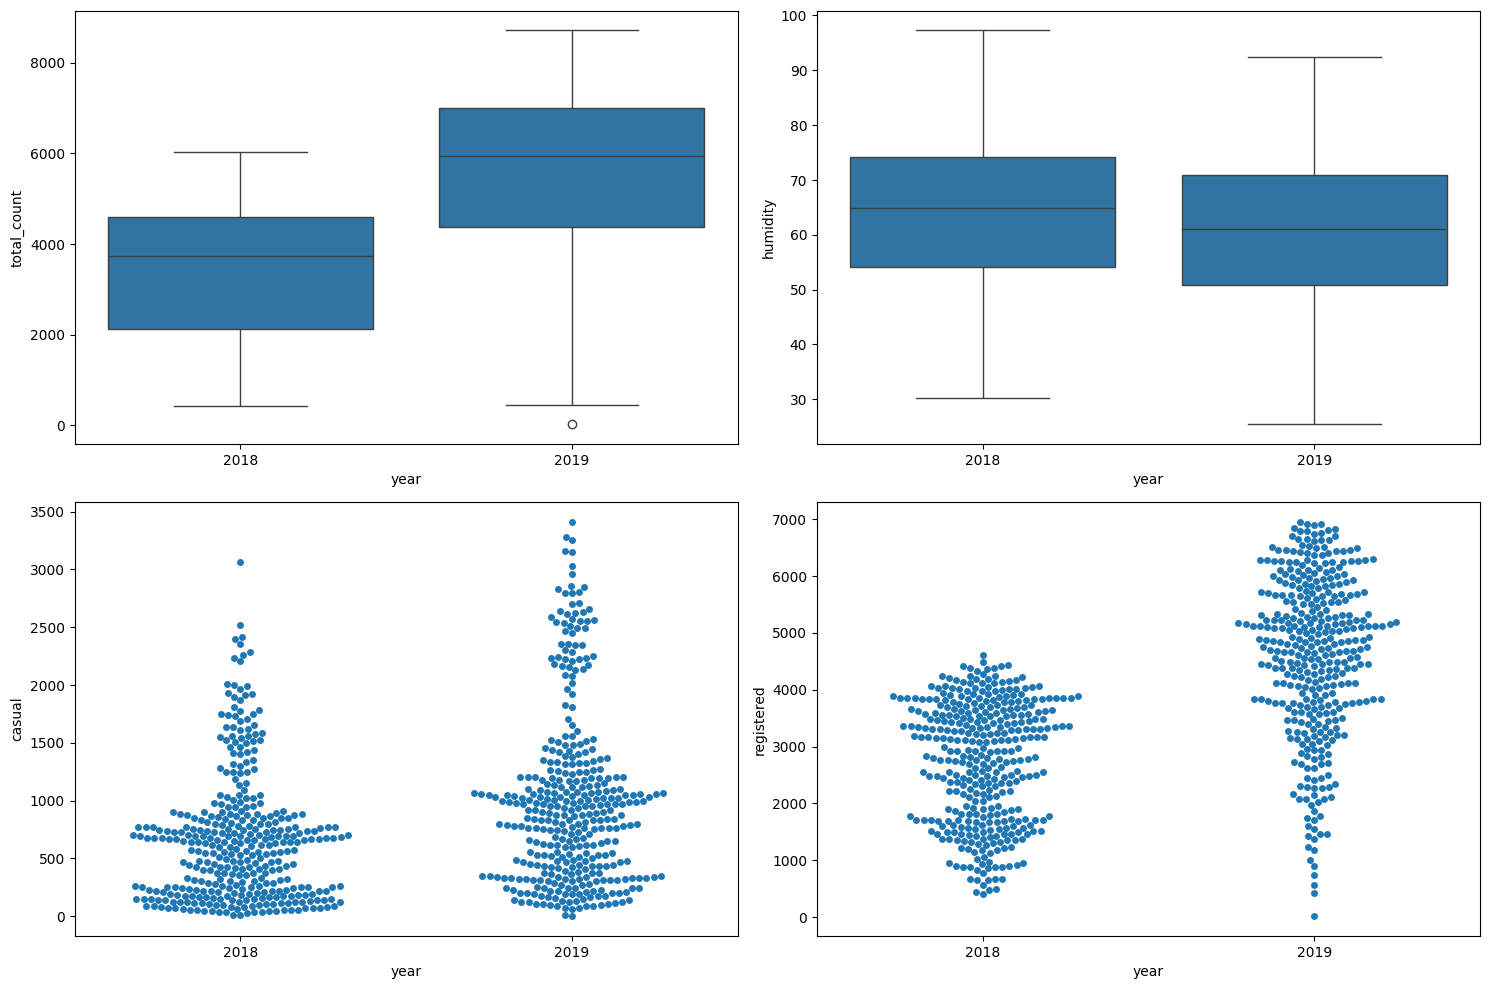

In [54]:
fig, axis = plt.subplots(2, 2, figsize=(15,10))
sns.boxplot(ax=axis[0,0], x=df2['year'], y=df2['total_count'])
sns.boxplot(ax=axis[0,1], x=df2['year'], y=df2['humidity'])
sns.swarmplot(ax=axis[1,0], x=df2['year'], y=df2['casual'])
sns.swarmplot(ax=axis[1,1], x=df2['year'], y=df2['registered'])
fig.tight_layout()
plt.show()

In [55]:
# Month

In [56]:
df2['month'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [57]:
df2.loc[:, 'month'] = df2['month'].map(lambda x: calendar.month_abbr[x]).str.lower()

In [58]:
df2['month'].unique()

array(['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep',
       'oct', 'nov', 'dec'], dtype=object)

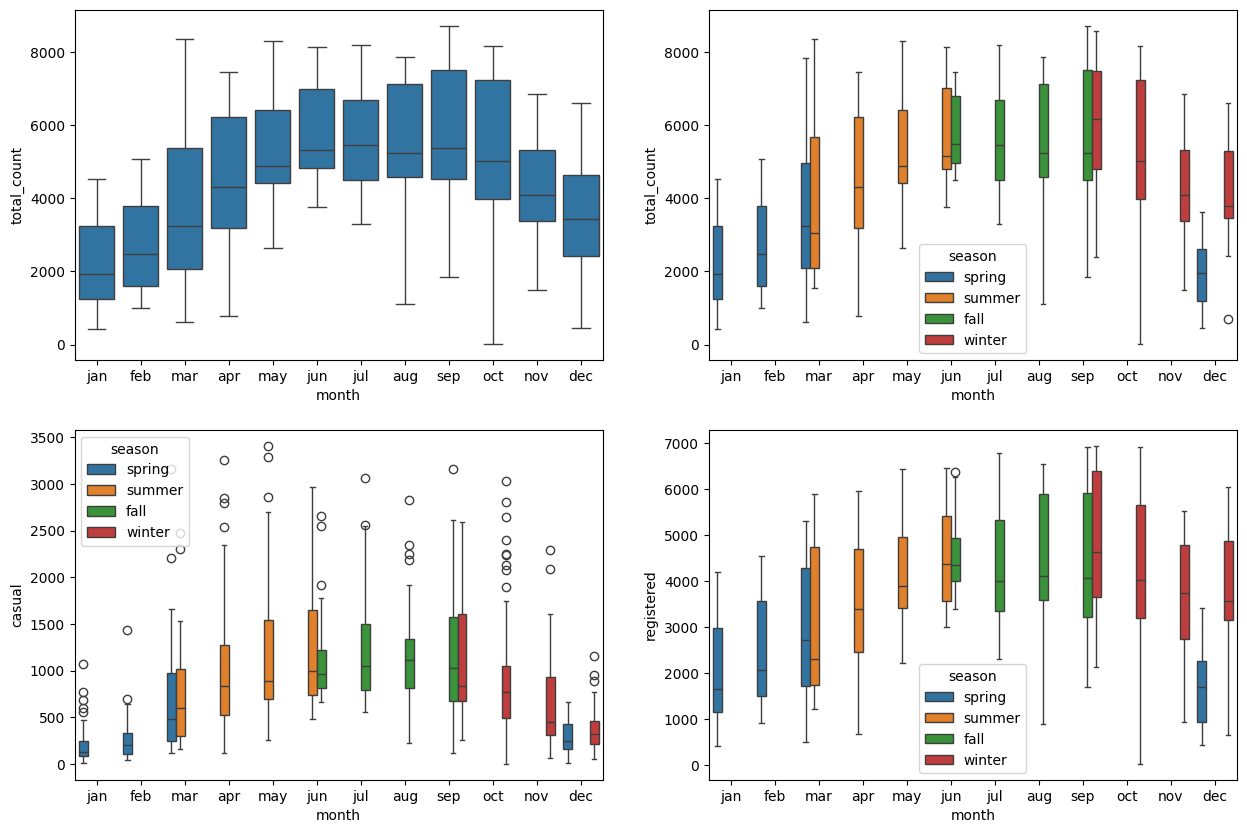

In [59]:
fig, axis = plt.subplots(2, 2, figsize=(15,10))
sns.boxplot(ax=axis[0,0], data=df2, x='month', y='total_count')
sns.boxplot(ax=axis[0,1], data=df2, x='month', y='total_count', hue='season')
sns.boxplot(ax=axis[1,0], data=df2, x='month', y='casual', hue='season')
sns.boxplot(ax=axis[1,1], data=df2, x='month', y='registered', hue='season')
plt.show()

In [60]:
# Holiday

In [61]:
# casual users for bikes tend to increase in holidays

In [62]:
df2['holiday'].unique()

array([0, 1], dtype=int64)

In [63]:
df2.loc[:, 'holiday'] = df2['holiday'].map({0:'no', 1:'yes'})

In [64]:
df2['holiday'].unique()

array(['no', 'yes'], dtype=object)

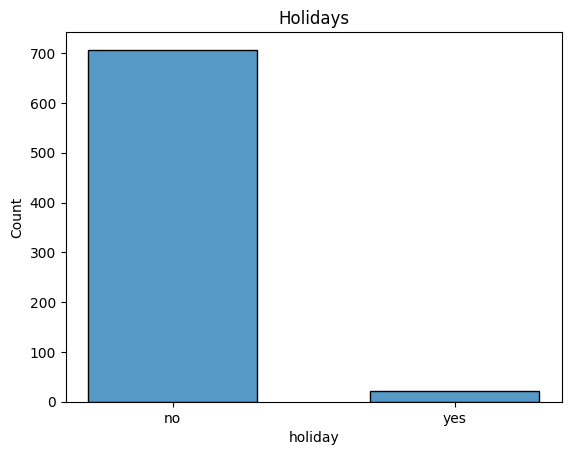

In [65]:
sns.histplot(df2['holiday'], shrink=0.6)
plt.title('Holidays')
plt.show()

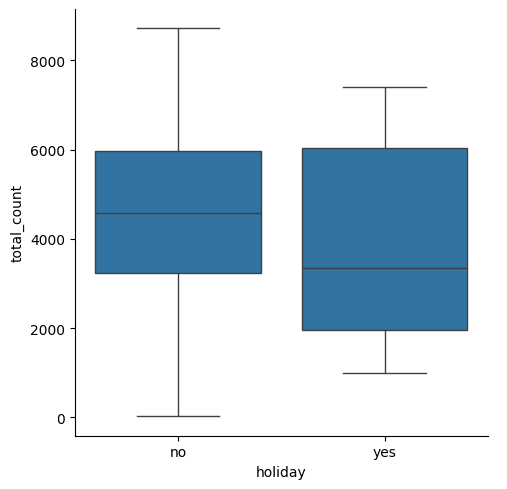

In [66]:
# people distribution during holidays
sns.catplot(data=df2, x='holiday', y='total_count', kind='box')
plt.show()

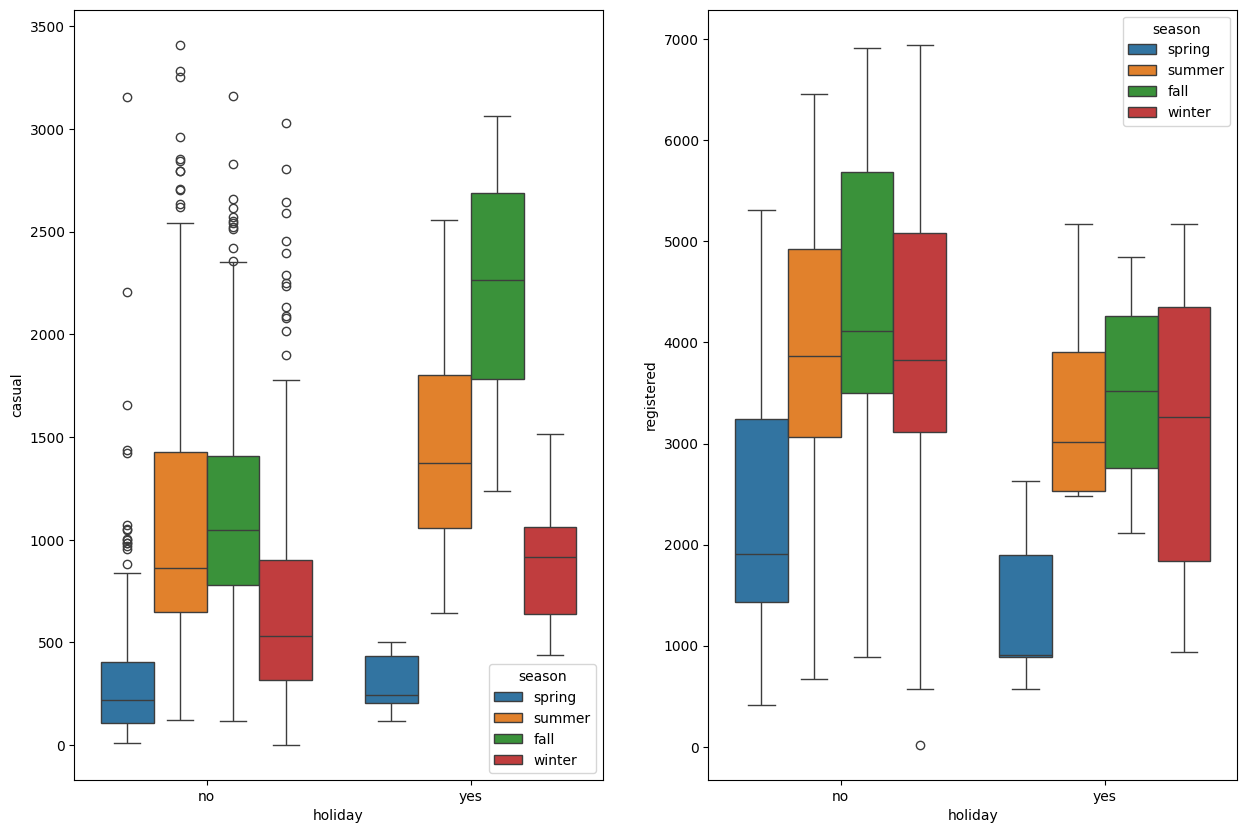

In [67]:
fig, axis = plt.subplots(1, 2, figsize=(15,10))
sns.boxplot(ax=axis[0], data=df2, x='holiday', y='casual', hue='season')
sns.boxplot(ax=axis[1], data=df2, x='holiday', y='registered', hue='season')
plt.show()

In [68]:
# Weekday
# weekdays have no observable trends to be used for analysis

In [69]:
df2['weekday'].unique()

array([6, 0, 1, 2, 3, 4, 5], dtype=int64)

In [70]:
df2['weekday'] = df2['weekday'].astype('str')

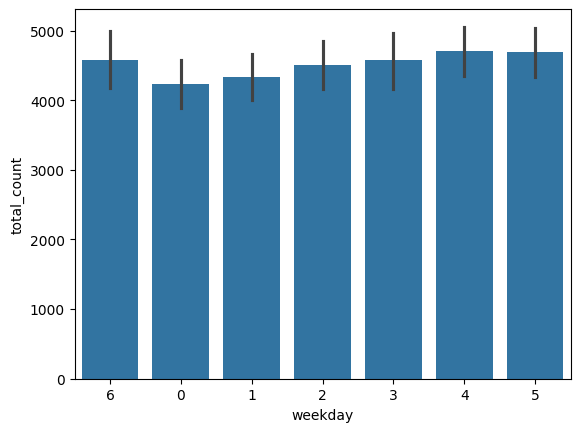

In [71]:
sns.barplot(data=df2, x='weekday', y='total_count')
plt.show()

In [72]:
# Working Day

In [73]:
# registered users significantly increase during working days
# whereas casual users decrease by large numbers

In [74]:
df2['workingday'].unique()

array([0, 1], dtype=int64)

In [75]:
df2['workingday'] = df2.loc[:, 'workingday'] = df2['workingday'].map({0:'no', 1:'yes'})

In [76]:
df2['workingday'].unique()

array(['no', 'yes'], dtype=object)

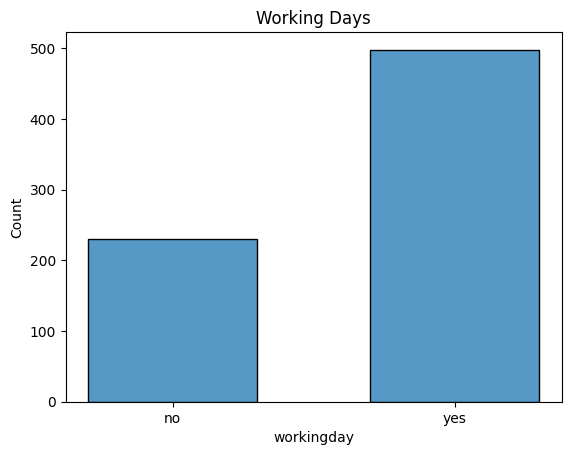

In [77]:
sns.histplot(df2['workingday'], shrink=0.6)
plt.title("Working Days")
plt.show()

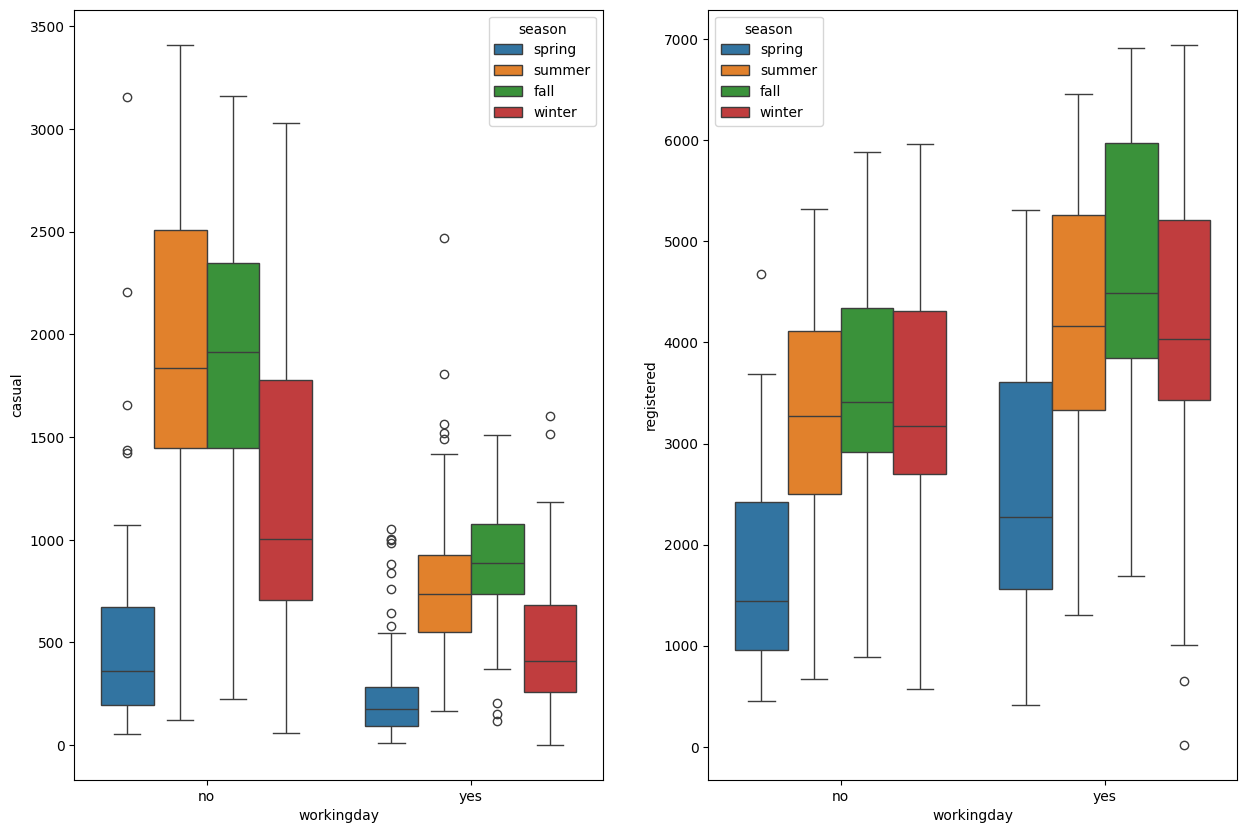

In [78]:
fig, axis = plt.subplots(1, 2, figsize=(15,10))
sns.boxplot(ax=axis[0], data=df2, x='workingday', y='casual', hue='season')
sns.boxplot(ax=axis[1], data=df2, x='workingday', y='registered', hue='season')
plt.show()

In [79]:
# Weather

In [80]:
# weather impacts heavily on bike users
# rain seems to impact the business heavily
# mist reduces the number of users 

In [81]:
df2['weather'].unique()

array([2, 1, 3], dtype=int64)

In [82]:
df2.loc[:, 'weather'] = df2['weather'].map({1:'clear', 2:'mist', 3:'light_rain'})

In [83]:
df2['weather'].unique()

array(['mist', 'clear', 'light_rain'], dtype=object)

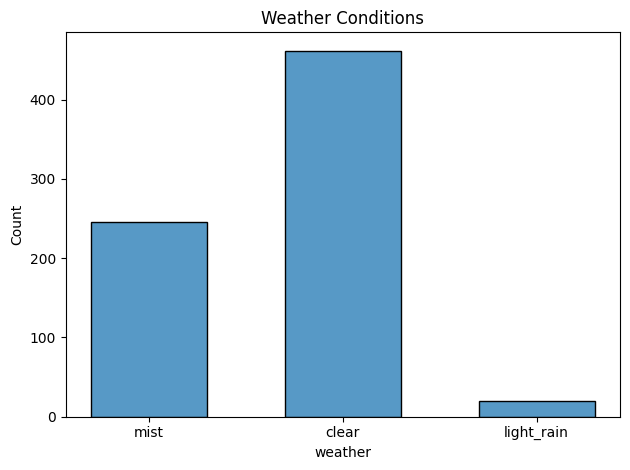

In [84]:
sns.histplot(df2['weather'], shrink=0.6)
plt.title("Weather Conditions")
plt.tight_layout()
plt.show()

<Figure size 2000x1500 with 0 Axes>

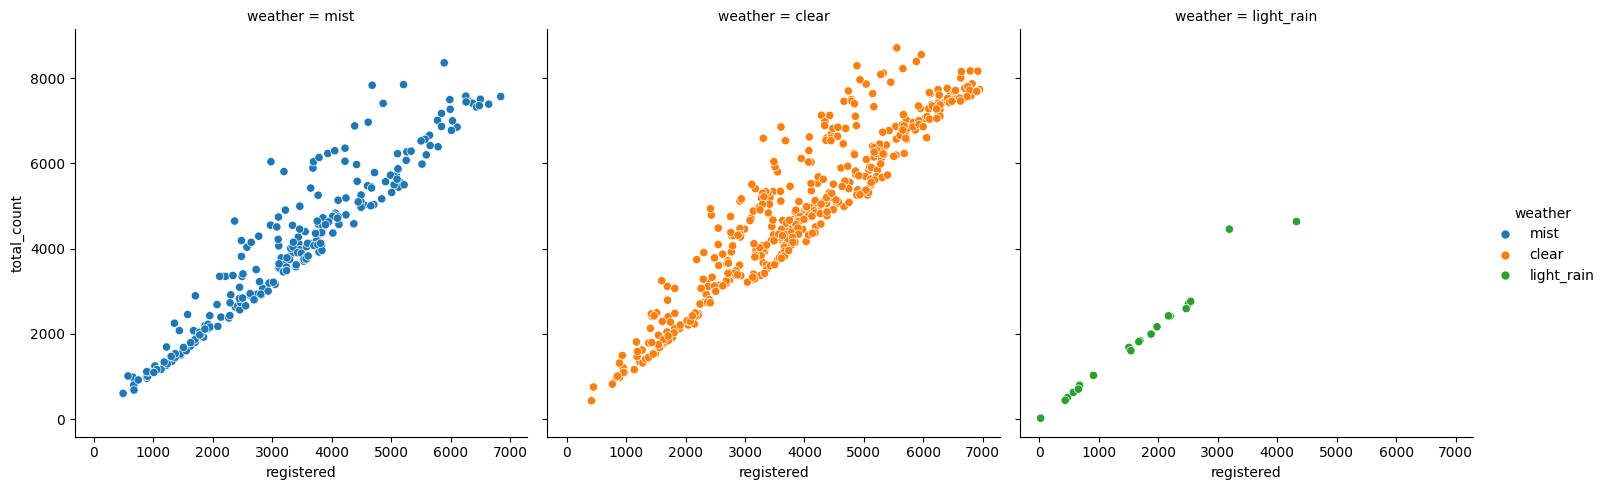

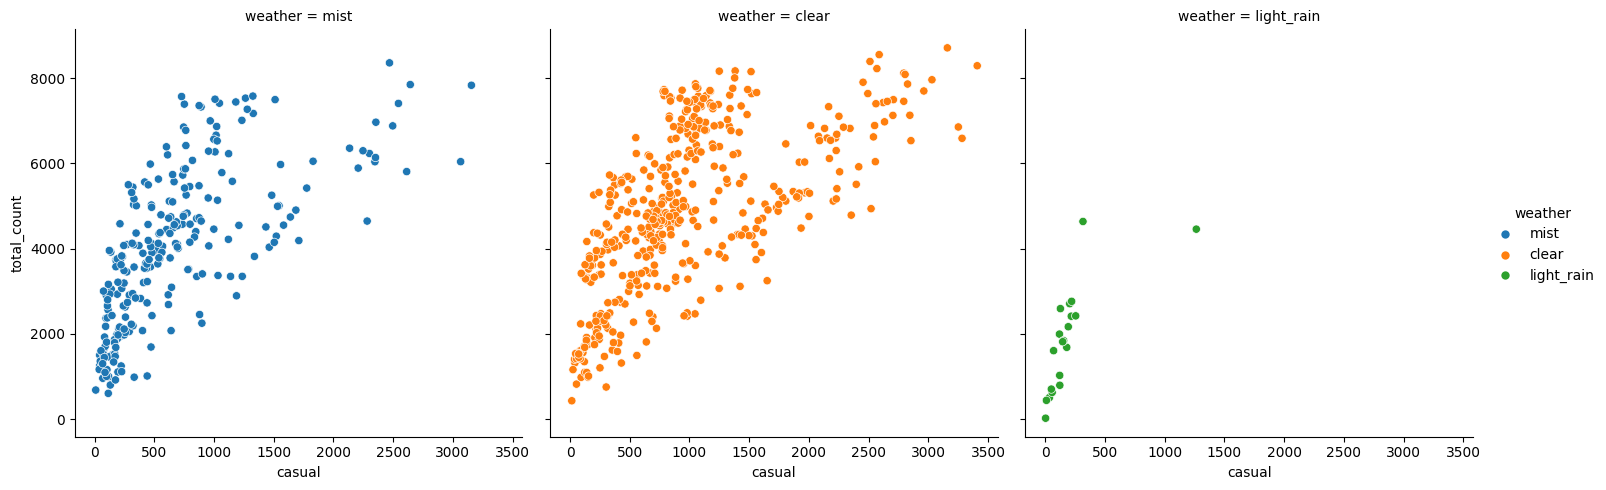

In [85]:
# Number of Customers using bikes in different weather conditions

plt.figure(figsize=(20,15))
sns.relplot(data=df2, x='registered', y='total_count', hue='weather', col='weather')
sns.relplot(data=df2, x='casual', y='total_count', hue='weather', col='weather')
plt.show()

In [86]:
pd.crosstab(index = df2['weather'], columns = df2['season'])

season      fall  spring  summer  winter
weather                                 
clear        136     110     113     103
light_rain     4       3       3      10
mist          48      65      68      65

In [87]:
# Humidity

<Figure size 2000x1500 with 0 Axes>

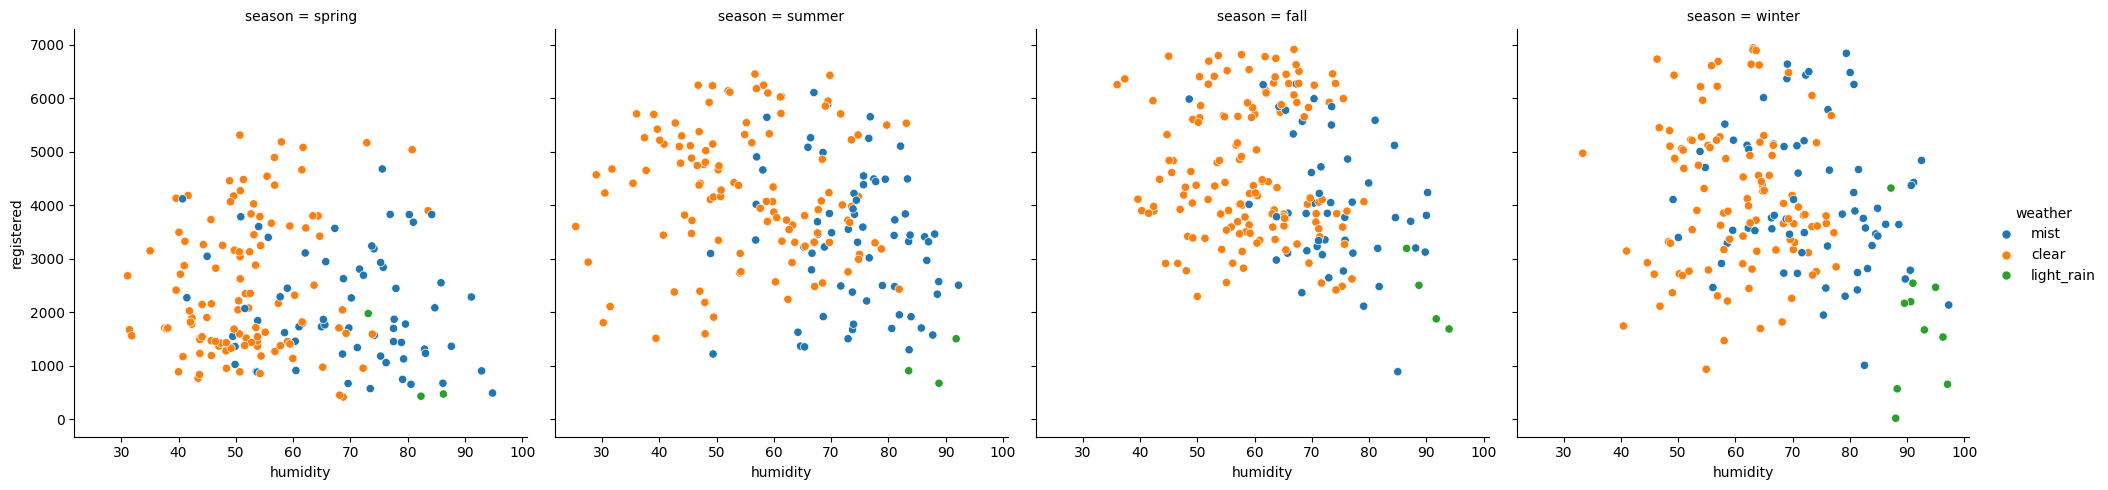

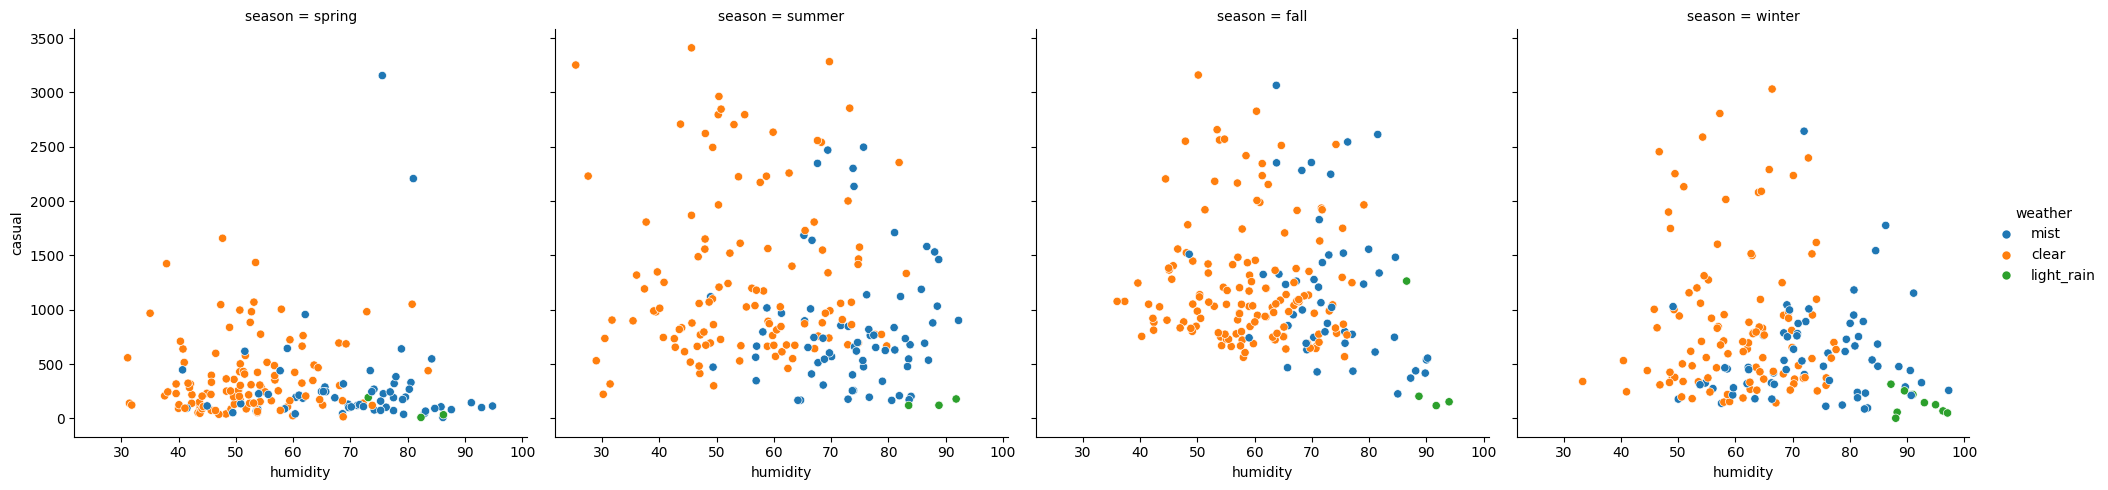

In [88]:
# Plotting Humidity vs Customers under different weaqther conditions

plt.figure(figsize=(20,15))
sns.relplot(data=df2, x='humidity', y='registered', hue='weather', col='season')
sns.relplot(data=df2, x='humidity', y='casual', hue='weather',  col='season')
plt.show()

In [89]:
# Windspeed

<Figure size 2000x1500 with 0 Axes>

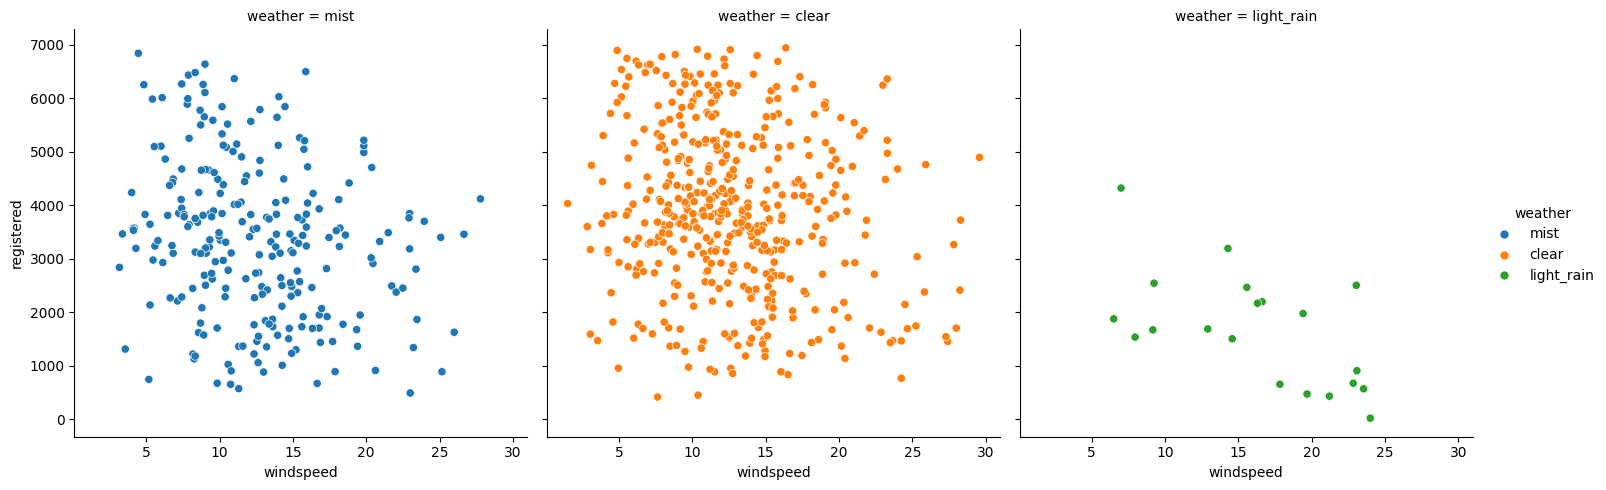

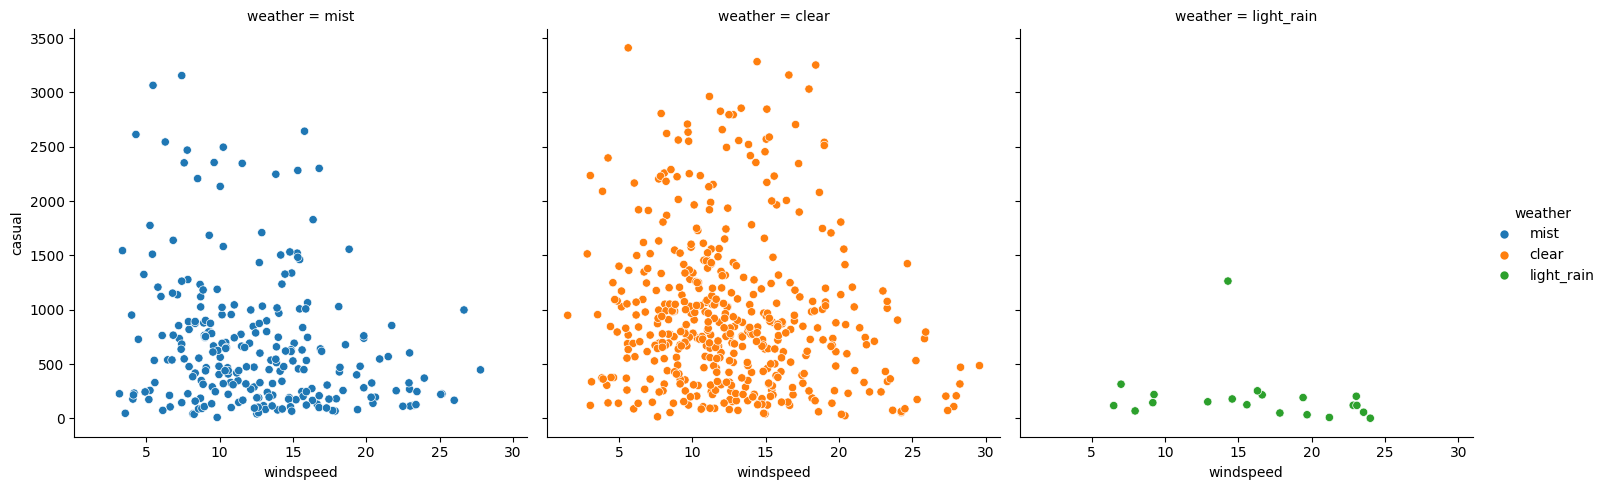

In [90]:
# Plotting Windspeed vs Customers under different weaqther conditions

plt.figure(figsize=(20,15))
sns.relplot(data=df2, x='windspeed', y='registered', hue='weather', col='weather')
sns.relplot(data=df2, x='windspeed', y='casual', hue='weather', col='weather')
plt.show()

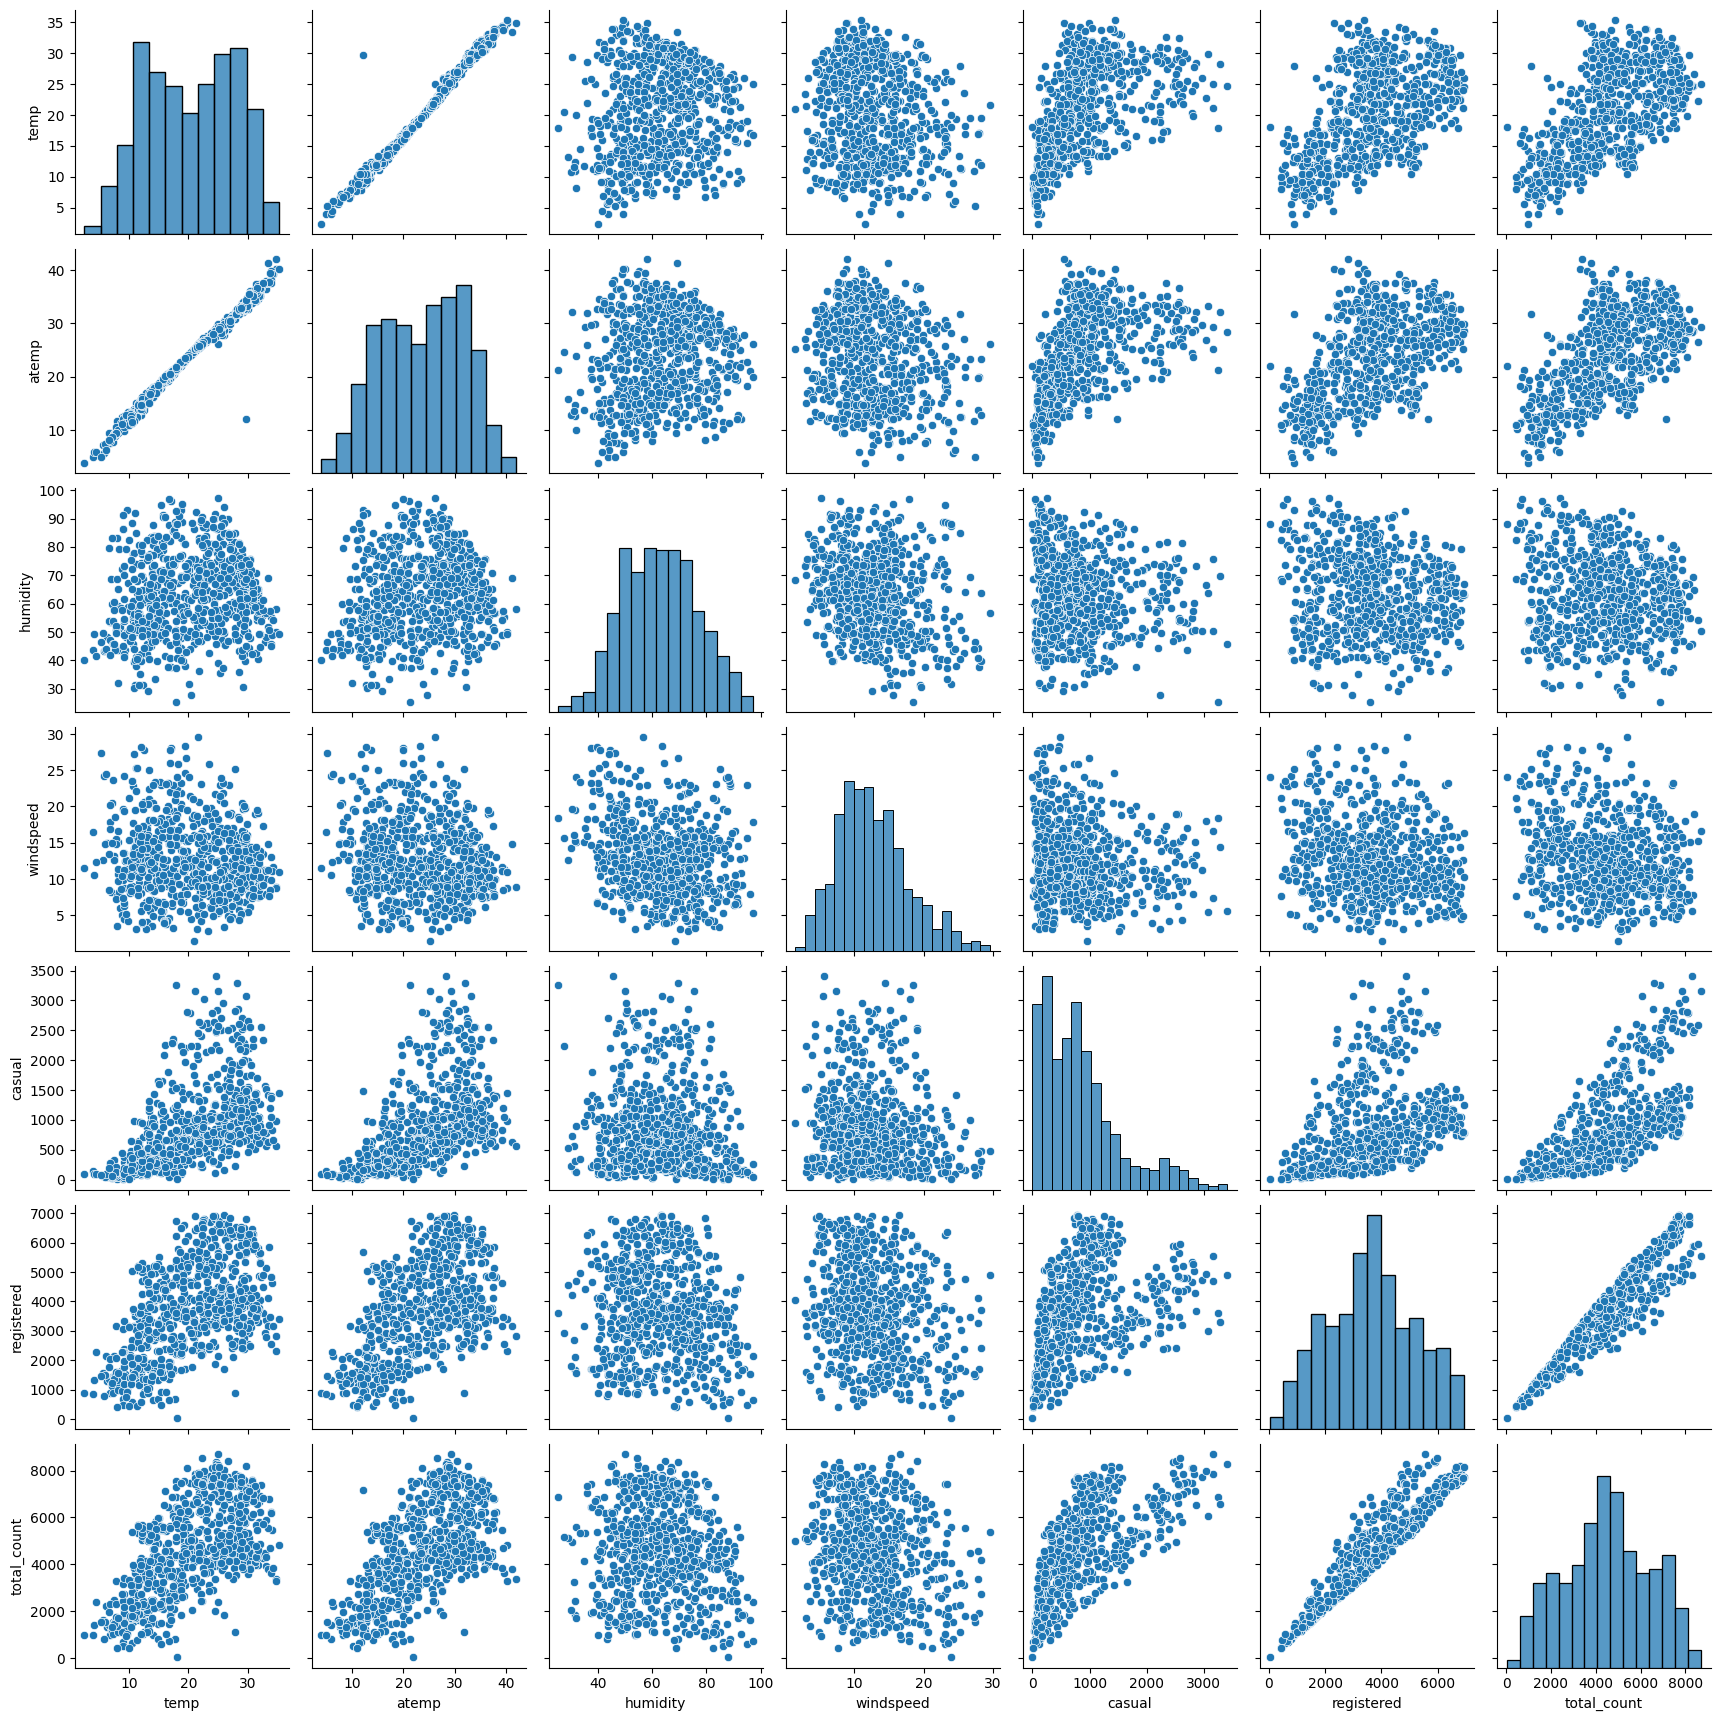

In [91]:
sns.pairplot(df2)
plt.show()

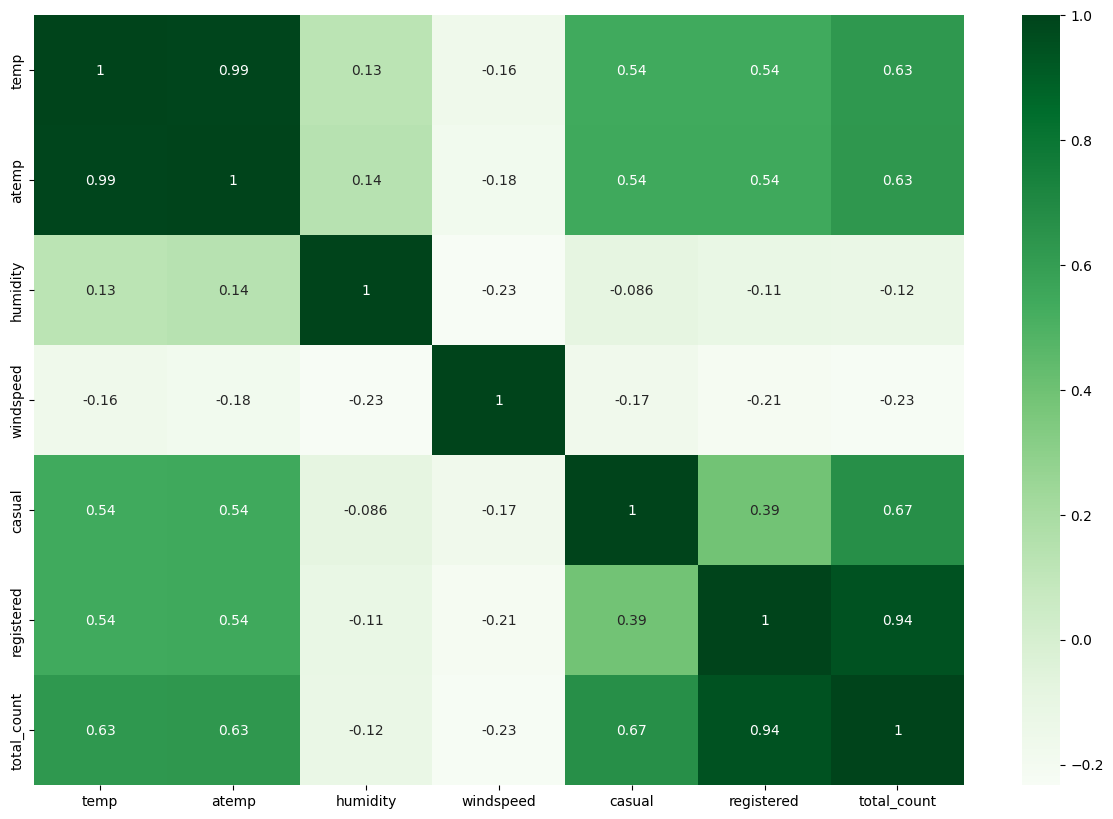

In [92]:
plt.figure(figsize=(15, 10))
sns.heatmap(df2.corr(numeric_only=True), cmap='Greens', annot=True)
plt.show()

### Data Preperation for Model
- create dummy variables
- delete duplicate columns

In [93]:
def create_dummies(dframe, coln, vals):
    coln_dframe = pd.DataFrame()
    dframe.loc[:, coln] = dframe[coln].map(vals)
    return pd.concat([dframe, pd.get_dummies(dframe[coln], drop_first=True, dtype=int)], axis=1)

season_dict = {1:'spring', 2:'summer', 3:'fall', 4:'winter'}
bike = create_dummies(df1, 'season', season_dict)

weather_dict = {1:'clear', 2:'mist', 3:'light_rain', 4:'heavy_rain'}
bike = create_dummies(bike, 'weather', weather_dict)

month_vals = lambda x: calendar.month_abbr[x].lower()
bike = create_dummies(bike, 'month', month_vals)

In [94]:
bike.drop(['season', 'weather', 'month'], axis=1, inplace=True)

In [95]:
bike.head()

dteday  year  holiday  weekday  workingday       temp     atemp  \
0  01-01-2018     0        0        6           0  14.110847  18.18125   
1  02-01-2018     0        0        0           0  14.902598  17.68695   
2  03-01-2018     0        0        1           1   8.050924   9.47025   
3  04-01-2018     0        0        2           1   8.200000  10.60610   
4  05-01-2018     0        0        3           1   9.305237  11.46350   

   humidity  windspeed  casual  ...  dec  feb  jan  jul  jun  mar  may  nov  \
0   80.5833  10.749882     331  ...    0    0    1    0    0    0    0    0   
1   69.6087  16.652113     131  ...    0    0    1    0    0    0    0    0   
2   43.7273  16.636703     120  ...    0    0    1    0    0    0    0    0   
3   59.0435  10.739832     108  ...    0    0    1    0    0    0    0    0   
4   43.6957  12.522300      82  ...    0    0    1    0    0    0    0    0   

   oct  sep  
0    0    0  
1    0    0  
2    0    0  
3    0    0  
4    0    0  

[5 rows x 28 columns]

In [96]:
dummy_df = pd.get_dummies(bike['weekday'], drop_first=True, dtype=int).add_prefix('day_', axis=1)
bike = pd.concat([bike, dummy_df], axis=1)

In [97]:
bike.drop(['dteday', 'weekday', 'casual', 'registered'], axis=1, inplace=True)

In [98]:
bike.head()

year  holiday  workingday       temp     atemp  humidity  windspeed  \
0     0        0           0  14.110847  18.18125   80.5833  10.749882   
1     0        0           0  14.902598  17.68695   69.6087  16.652113   
2     0        0           1   8.050924   9.47025   43.7273  16.636703   
3     0        0           1   8.200000  10.60610   59.0435  10.739832   
4     0        0           1   9.305237  11.46350   43.6957  12.522300   

   total_count  spring  summer  ...  may  nov  oct  sep  day_1  day_2  day_3  \
0          985       1       0  ...    0    0    0    0      0      0      0   
1          801       1       0  ...    0    0    0    0      0      0      0   
2         1349       1       0  ...    0    0    0    0      1      0      0   
3         1562       1       0  ...    0    0    0    0      0      1      0   
4         1600       1       0  ...    0    0    0    0      0      0      1   

   day_4  day_5  day_6  
0      0      0      1  
1      0      0      0  
2      0      0      0  
3      0      0      0  
4      0      0      0  

[5 rows x 30 columns]

In [99]:
bike.shape

(728, 30)

- Train - Test split
- Scaling

In [100]:
# train-test split
X = bike.drop('total_count', axis=1)
y = bike['total_count']

In [101]:
train_in, test_in, train_out, test_out = train_test_split(X, y, train_size=0.7, random_state=37)

In [102]:
train_in.shape, test_in.shape

((509, 29), (219, 29))

In [103]:
# MinMax Scaling
num_cols = ['temp', 'atemp', 'humidity', 'windspeed']
scale = MinMaxScaler()
train_in[num_cols] = scale.fit_transform(train_in[num_cols])
test_in[num_cols] = scale.transform(test_in[num_cols])

In [104]:
X_train_df = pd.DataFrame(train_in, columns = X.columns)
X_test_df = pd.DataFrame(test_in, columns=X.columns)

In [105]:
X_train_df.head()

year  holiday  workingday      temp     atemp  humidity  windspeed  \
402     1        0           1  0.347319  0.360486  0.337007   0.298177   
114     0        0           1  0.687702  0.653801  0.727379   0.388722   
262     0        0           1  0.627040  0.595682  0.872970   0.268535   
617     1        0           1  0.656247  0.641642  0.347447   0.563782   
561     1        0           1  0.898896  0.859462  0.544083   0.338275   

     spring  summer  winter  ...  may  nov  oct  sep  day_1  day_2  day_3  \
402       1       0       0  ...    0    0    0    0      0      1      0   
114       0       1       0  ...    0    0    0    0      1      0      0   
262       0       0       0  ...    0    0    0    1      0      1      0   
617       0       0       0  ...    0    0    0    1      1      0      0   
561       0       0       0  ...    0    0    0    0      1      0      0   

     day_4  day_5  day_6  
402      0      0      0  
114      0      0      0  
262      0      0      0  
617      0      0      0  
561      0      0      0  

[5 rows x 29 columns]

### MODELLING

In [106]:
# display each feature and its VIF for given data
def get_VIF(xdf):
    vif = pd.DataFrame()
    vif['features'] = xdf.columns
    vif['VIF'] = [variance_inflation_factor(xdf.values, i) for i in range(len(xdf.columns))]
    vif['VIF'] = vif['VIF'].round(2)
    vif = vif.sort_values(by='VIF', ascending=False, ignore_index=True)
    return vif

# feature selection using RFE
def select_features(X_df, train_out, no_features):
    estimator = LinearRegression()
    features = RFE(estimator, n_features_to_select=no_features)
    features = features.fit(X_df, train_out)
    return X_df.columns[features.support_]

# Model generation using OLS for given data
def create_models(X_train, X_test, train_out, drop_feature):
    X_train.drop(drop_feature, axis=1, errors='ignore', inplace=True)
    X_test.drop(drop_feature, axis=1, errors='ignore', inplace=True)
    model_X = sm.OLS(np.array(train_out), X_train)
    return model_X.fit()

## MODEL - 1

In [107]:
chosen_features = select_features(X_train_df, train_out, 20)
X_train = X_train_df[chosen_features]
X_test = X_test_df[chosen_features]

In [108]:
chosen_features

Index(['year', 'holiday', 'workingday', 'temp', 'atemp', 'humidity',
       'windspeed', 'spring', 'winter', 'light_rain', 'mist', 'mar', 'may',
       'sep', 'day_1', 'day_2', 'day_3', 'day_4', 'day_5', 'day_6'],
      dtype='object')

In [109]:
#STEP 1

In [110]:
X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)

In [111]:
model1 = create_models(X_train_sm, X_test_sm, train_out, 0)
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     138.1
Date:                Tue, 27 Aug 2024   Prob (F-statistic):          1.37e-182
Time:                        11:30:08   Log-Likelihood:                -4102.2
No. Observations:                 509   AIC:                             8244.
Df Residuals:                     489   BIC:                             8329.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2392.1568    251.254      9.521      0.000    1898.486    2885.828
year        1945.7783     70.729     27.510      0.000    1806.808    2084.748
holiday       -1.6207    205.843     -0.008      0.994    -406.067     402.826
workingday   311.0712     80.527      3.863      0.000     152.850     469.293
temp       -1523.1265   1880.889     -0.810      0.418   -5218.749    2172.496
atemp       5791.8476   2076.461      2.789      0.005    1711.961    9871.734
humidity   -1400.3888    272.031     -5.148      0.000   -1934.883    -865.895
windspeed  -1193.0934    212.070     -5.626      0.000   -1609.775    -776.412
spring      -965.2698    137.575     -7.016      0.000   -1235.582    -694.958
winter       594.3606    116.121      5.118      0.000     366.203     822.518
light_rain -1743.7106    239.849     -7.270      0.000   -2214.973   -1272.448
mist        -380.9016     95.349     -3.995      0.000    -568.246    -193.557
mar          479.8048    135.065      3.552      0.000     214.425     745.185
may          400.8932    142.429      2.815      0.005     121.045     680.742
sep          705.9295    131.807      5.356      0.000     446.951     964.908
day_1        -95.4323     88.146     -1.083      0.279    -268.623      77.759
day_2          4.4144     91.472      0.048      0.962    -175.312     184.141
day_3        108.3964     93.462      1.160      0.247     -75.241     292.034
day_4        131.2053     96.727      1.356      0.176     -58.846     321.257
day_5        160.8667     97.213      1.655      0.099     -30.139     351.873
day_6        539.9190    130.730      4.130      0.000     283.057     796.781
==============================================================================
Omnibus:                       74.810   Durbin-Watson:                   1.943
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              160.011
Skew:                          -0.804   Prob(JB):                     1.79e-35
Kurtosis:                       5.227   Cond. No.                     3.39e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.41e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [112]:
get_VIF(X_train_sm)

features     VIF
0        day_1     inf
1      holiday     inf
2   workingday     inf
3        day_5     inf
4        day_4     inf
5        day_3     inf
6        day_2     inf
7        atemp  179.36
8         temp  178.48
9        const   52.70
10      spring    2.96
11    humidity    2.34
12      winter    2.12
13        mist    1.70
14       day_6    1.65
15  light_rain    1.55
16   windspeed    1.27
17         may    1.20
18         sep    1.15
19         mar    1.13
20        year    1.04

In [113]:
# STEP 2

In [114]:
model1 = create_models(X_train_sm, X_test_sm, train_out, 'holiday')
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     138.1
Date:                Tue, 27 Aug 2024   Prob (F-statistic):          1.37e-182
Time:                        11:30:08   Log-Likelihood:                -4102.2
No. Observations:                 509   AIC:                             8244.
Df Residuals:                     489   BIC:                             8329.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2392.1568    251.254      9.521      0.000    1898.486    2885.828
year        1945.7783     70.729     27.510      0.000    1806.808    2084.748
workingday   312.6919    232.670      1.344      0.180    -144.464     769.847
temp       -1523.1265   1880.889     -0.810      0.418   -5218.749    2172.496
atemp       5791.8476   2076.461      2.789      0.005    1711.961    9871.734
humidity   -1400.3888    272.031     -5.148      0.000   -1934.883    -865.895
windspeed  -1193.0934    212.070     -5.626      0.000   -1609.775    -776.412
spring      -965.2698    137.575     -7.016      0.000   -1235.582    -694.958
winter       594.3606    116.121      5.118      0.000     366.203     822.518
light_rain -1743.7106    239.849     -7.270      0.000   -2214.973   -1272.448
mist        -380.9016     95.349     -3.995      0.000    -568.246    -193.557
mar          479.8048    135.065      3.552      0.000     214.425     745.185
may          400.8932    142.429      2.815      0.005     121.045     680.742
sep          705.9295    131.807      5.356      0.000     446.951     964.908
day_1        -97.0530    237.722     -0.408      0.683    -564.136     370.030
day_2          2.7937    261.870      0.011      0.991    -511.735     517.323
day_3        106.7757    262.486      0.407      0.684    -408.964     622.516
day_4        129.5846    266.604      0.486      0.627    -394.246     653.415
day_5        159.2460    264.453      0.602      0.547    -360.358     678.850
day_6        539.9190    130.730      4.130      0.000     283.057     796.781
==============================================================================
Omnibus:                       74.810   Durbin-Watson:                   1.943
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              160.011
Skew:                          -0.804   Prob(JB):                     1.79e-35
Kurtosis:                       5.227   Cond. No.                         144.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [115]:
get_VIF(X_train_sm)

features     VIF
0        atemp  179.36
1         temp  178.48
2        const   52.70
3   workingday    9.67
4        day_2    7.58
5        day_3    7.31
6        day_4    7.04
7        day_5    6.67
8        day_1    5.66
9       spring    2.96
10    humidity    2.34
11      winter    2.12
12        mist    1.70
13       day_6    1.65
14  light_rain    1.55
15   windspeed    1.27
16         may    1.20
17         sep    1.15
18         mar    1.13
19        year    1.04

In [116]:
# STEP 3

In [117]:
model1 = create_models(X_train_sm, X_test_sm, train_out, 'day_2')
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     146.1
Date:                Tue, 27 Aug 2024   Prob (F-statistic):          1.11e-183
Time:                        11:30:08   Log-Likelihood:                -4102.2
No. Observations:                 509   AIC:                             8242.
Df Residuals:                     490   BIC:                             8323.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2392.4512    249.480      9.590      0.000    1902.269    2882.633
year        1945.7961     70.637     27.546      0.000    1807.007    2084.585
workingday   314.8708    111.331      2.828      0.005      96.125     533.617
temp       -1521.0071   1868.460     -0.814      0.416   -5192.189    2150.175
atemp       5789.6150   2063.780      2.805      0.005    1734.665    9844.565
humidity   -1400.4013    271.751     -5.153      0.000   -1934.342    -866.460
windspeed  -1193.0714    211.844     -5.632      0.000   -1609.306    -776.837
spring      -965.1877    137.219     -7.034      0.000   -1234.799    -695.577
winter       594.3986    115.948      5.126      0.000     366.583     822.215
light_rain -1743.7498    239.576     -7.278      0.000   -2214.474   -1273.026
mist        -380.8621     95.180     -4.002      0.000    -567.873    -193.851
mar          479.7374    134.780      3.559      0.000     214.919     744.556
may          400.8716    142.269      2.818      0.005     121.338     680.405
sep          705.9631    131.635      5.363      0.000     447.325     964.601
day_1        -99.2482    118.922     -0.835      0.404    -332.909     134.412
day_3        104.2995    122.447      0.852      0.395    -136.287     344.885
day_4        127.0766    125.610      1.012      0.312    -119.724     373.877
day_5        156.7715    126.899      1.235      0.217     -92.562     406.105
day_6        539.5878    126.861      4.253      0.000     290.329     788.847
==============================================================================
Omnibus:                       74.819   Durbin-Watson:                   1.943
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              160.056
Skew:                          -0.804   Prob(JB):                     1.75e-35
Kurtosis:                       5.228   Cond. No.                         143.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [118]:
get_VIF(X_train_sm)

features     VIF
0        atemp  177.54
1         temp  176.49
2        const   52.07
3       spring    2.95
4     humidity    2.34
5   workingday    2.22
6       winter    2.12
7         mist    1.70
8        day_3    1.59
9        day_4    1.57
10       day_6    1.56
11  light_rain    1.55
12       day_5    1.54
13       day_1    1.42
14   windspeed    1.27
15         may    1.20
16         sep    1.14
17         mar    1.13
18        year    1.04

In [119]:
# STEP 4

In [120]:
model1 = create_models(X_train_sm, X_test_sm, train_out, 'temp')
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     154.7
Date:                Tue, 27 Aug 2024   Prob (F-statistic):          1.22e-184
Time:                        11:30:09   Log-Likelihood:                -4102.5
No. Observations:                 509   AIC:                             8241.
Df Residuals:                     491   BIC:                             8317.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2436.9196    243.342     10.014      0.000    1958.800    2915.040
year        1945.3347     70.610     27.550      0.000    1806.599    2084.071
workingday   316.5220    111.275      2.845      0.005      97.889     535.155
atemp       4123.1854    261.751     15.752      0.000    3608.895    4637.476
humidity   -1370.8014    269.215     -5.092      0.000   -1899.756    -841.846
windspeed  -1235.1220    205.379     -6.014      0.000   -1638.652    -831.592
spring      -962.0866    137.119     -7.016      0.000   -1231.500    -692.674
winter       609.3623    114.442      5.325      0.000     384.506     834.219
light_rain -1770.6567    237.204     -7.465      0.000   -2236.716   -1304.597
mist        -388.3866     94.697     -4.101      0.000    -574.449    -202.325
mar          486.8444    134.451      3.621      0.000     222.674     751.015
may          406.7943    142.034      2.864      0.004     127.724     685.864
sep          694.7085    130.862      5.309      0.000     437.590     951.827
day_1        -94.6065    118.745     -0.797      0.426    -327.917     138.704
day_3         99.8656    122.284      0.817      0.415    -140.398     340.130
day_4        125.7671    125.556      1.002      0.317    -120.927     372.461
day_5        153.9265    126.807      1.214      0.225     -95.225     403.078
day_6        538.1966    126.806      4.244      0.000     289.047     787.346
==============================================================================
Omnibus:                       74.112   Durbin-Watson:                   1.942
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              158.575
Skew:                          -0.797   Prob(JB):                     3.68e-35
Kurtosis:                       5.222   Cond. No.                         17.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [121]:
get_VIF(X_train_sm)

features    VIF
0        const  49.57
1       spring   2.95
2        atemp   2.86
3     humidity   2.30
4   workingday   2.22
5       winter   2.06
6         mist   1.68
7        day_3   1.59
8        day_4   1.57
9        day_6   1.56
10       day_5   1.54
11  light_rain   1.52
12       day_1   1.42
13   windspeed   1.20
14         may   1.19
15         sep   1.13
16         mar   1.12
17        year   1.04

In [122]:
# STEP 5

In [123]:
model1 = create_models(X_train_sm, X_test_sm, train_out, 'day_1')
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     164.5
Date:                Tue, 27 Aug 2024   Prob (F-statistic):          1.29e-185
Time:                        11:30:09   Log-Likelihood:                -4102.8
No. Observations:                 509   AIC:                             8240.
Df Residuals:                     492   BIC:                             8312.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2423.7935    242.694      9.987      0.000    1946.950    2900.637
year        1942.4082     70.489     27.556      0.000    1803.912    2080.904
workingday   286.6617    104.734      2.737      0.006      80.881     492.443
atemp       4129.4907    261.534     15.789      0.000    3615.629    4643.353
humidity   -1370.9283    269.115     -5.094      0.000   -1899.684    -842.172
windspeed  -1238.0419    205.270     -6.031      0.000   -1641.356    -834.728
spring      -959.9913    137.043     -7.005      0.000   -1229.253    -690.729
winter       609.5758    114.399      5.328      0.000     384.805     834.347
light_rain -1769.8551    237.114     -7.464      0.000   -2235.735   -1303.975
mist        -387.3060     94.652     -4.092      0.000    -573.279    -201.333
mar          490.0000    134.343      3.647      0.000     226.044     753.956
may          411.8597    141.839      2.904      0.004     133.174     690.545
sep          693.5118    130.805      5.302      0.000     436.507     950.516
day_3        140.1864    111.279      1.260      0.208     -78.453     358.826
day_4        166.7069    114.517      1.456      0.146     -58.296     391.710
day_5        194.5959    116.036      1.677      0.094     -33.392     422.583
day_6        549.6398    125.943      4.364      0.000     302.187     797.093
==============================================================================
Omnibus:                       74.245   Durbin-Watson:                   1.940
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              158.997
Skew:                          -0.798   Prob(JB):                     2.98e-35
Kurtosis:                       5.225   Cond. No.                         17.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [124]:
get_VIF(X_train_sm)

features    VIF
0        const  49.34
1       spring   2.95
2        atemp   2.86
3     humidity   2.30
4       winter   2.06
5   workingday   1.97
6         mist   1.68
7        day_6   1.54
8   light_rain   1.52
9        day_3   1.32
10       day_4   1.30
11       day_5   1.29
12   windspeed   1.20
13         may   1.19
14         sep   1.13
15         mar   1.12
16        year   1.04

In [125]:
# STEP 6

In [126]:
model1 = create_models(X_train_sm, X_test_sm, train_out, 'day_3')
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     175.1
Date:                Tue, 27 Aug 2024   Prob (F-statistic):          2.10e-186
Time:                        11:30:09   Log-Likelihood:                -4103.6
No. Observations:                 509   AIC:                             8239.
Df Residuals:                     493   BIC:                             8307.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2432.4614    242.740     10.021      0.000    1955.528    2909.395
year        1944.0201     70.519     27.567      0.000    1805.465    2082.575
workingday   332.2182     98.351      3.378      0.001     138.978     525.458
atemp       4134.8634    261.655     15.803      0.000    3620.766    4648.960
humidity   -1376.8028    269.234     -5.114      0.000   -1905.791    -847.814
windspeed  -1249.1159    205.204     -6.087      0.000   -1652.297    -845.934
spring      -962.2165    137.113     -7.018      0.000   -1231.615    -692.818
winter       604.2956    114.390      5.283      0.000     379.543     829.048
light_rain -1743.7514    236.347     -7.378      0.000   -2208.123   -1279.380
mist        -390.8516     94.667     -4.129      0.000    -576.852    -204.851
mar          495.2155    134.359      3.686      0.000     231.229     759.202
may          412.2884    141.923      2.905      0.004     133.439     691.138
sep          692.3224    130.879      5.290      0.000     435.173     949.472
day_4        118.1270    107.893      1.095      0.274     -93.861     330.115
day_5        147.8611    110.012      1.344      0.180     -68.288     364.011
day_6        546.0523    125.986      4.334      0.000     298.517     793.588
==============================================================================
Omnibus:                       76.118   Durbin-Watson:                   1.940
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              167.928
Skew:                          -0.805   Prob(JB):                     3.43e-37
Kurtosis:                       5.307   Cond. No.                         17.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [127]:
get_VIF(X_train_sm)

features    VIF
0        const  49.31
1       spring   2.95
2        atemp   2.85
3     humidity   2.30
4       winter   2.06
5   workingday   1.73
6         mist   1.68
7        day_6   1.54
8   light_rain   1.51
9    windspeed   1.20
10         may   1.19
11       day_4   1.16
12       day_5   1.16
13         sep   1.13
14         mar   1.12
15        year   1.04

In [128]:
# STEP 7

In [129]:
model1 = create_models(X_train_sm, X_test_sm, train_out, 'day_4')
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     187.5
Date:                Tue, 27 Aug 2024   Prob (F-statistic):          2.73e-187
Time:                        11:30:10   Log-Likelihood:                -4104.3
No. Observations:                 509   AIC:                             8239.
Df Residuals:                     494   BIC:                             8302.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2448.4859    242.347     10.103      0.000    1972.327    2924.645
year        1942.3996     70.518     27.545      0.000    1803.848    2080.951
workingday   361.0049     94.791      3.808      0.000     174.762     547.248
atemp       4131.8024    261.693     15.789      0.000    3617.634    4645.971
humidity   -1400.8148    268.394     -5.219      0.000   -1928.149    -873.481
windspeed  -1250.4716    205.241     -6.093      0.000   -1653.725    -847.218
spring      -966.1966    137.093     -7.048      0.000   -1235.553    -696.840
winter       601.3710    114.382      5.258      0.000     376.635     826.107
light_rain -1741.1440    236.383     -7.366      0.000   -2205.583   -1276.705
mist        -386.2582     94.593     -4.083      0.000    -572.112    -200.404
mar          493.1469    134.373      3.670      0.000     229.135     757.159
may          409.9157    141.935      2.888      0.004     131.044     688.787
sep          695.7244    130.868      5.316      0.000     438.597     952.852
day_5        118.2982    106.668      1.109      0.268     -91.280     327.877
day_6        545.8019    126.011      4.331      0.000     298.218     793.386
==============================================================================
Omnibus:                       76.888   Durbin-Watson:                   1.956
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              171.517
Skew:                          -0.809   Prob(JB):                     5.70e-38
Kurtosis:                       5.339   Cond. No.                         17.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [130]:
get_VIF(X_train_sm)

features    VIF
0        const  49.13
1       spring   2.94
2        atemp   2.85
3     humidity   2.28
4       winter   2.06
5         mist   1.68
6   workingday   1.61
7        day_6   1.54
8   light_rain   1.51
9    windspeed   1.20
10         may   1.19
11         sep   1.13
12         mar   1.12
13       day_5   1.09
14        year   1.04

In [131]:
# STEP 8

In [132]:
model1 = create_models(X_train_sm, X_test_sm, train_out, 'day_5')
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     201.7
Date:                Tue, 27 Aug 2024   Prob (F-statistic):          3.48e-188
Time:                        11:30:10   Log-Likelihood:                -4104.9
No. Observations:                 509   AIC:                             8238.
Df Residuals:                     495   BIC:                             8297.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2474.2319    241.289     10.254      0.000    2000.155    2948.309
year        1941.6909     70.531     27.530      0.000    1803.114    2080.268
workingday   382.5094     92.808      4.122      0.000     200.163     564.856
atemp       4109.8687    261.005     15.746      0.000    3597.054    4622.683
humidity   -1416.7443    268.071     -5.285      0.000   -1943.442    -890.046
windspeed  -1259.1774    205.139     -6.138      0.000   -1662.227    -856.128
spring      -974.9766    136.896     -7.122      0.000   -1243.945    -706.008
winter       599.4247    114.395      5.240      0.000     374.664     824.185
light_rain -1752.0529    236.233     -7.417      0.000   -2216.195   -1287.911
mist        -382.1844     94.543     -4.042      0.000    -567.940    -196.428
mar          494.6977    134.397      3.681      0.000     230.640     758.756
may          406.7371    141.939      2.866      0.004     127.859     685.615
sep          698.2648    130.879      5.335      0.000     441.118     955.411
day_6        545.5387    126.040      4.328      0.000     297.899     793.178
==============================================================================
Omnibus:                       74.796   Durbin-Watson:                   1.957
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              167.152
Skew:                          -0.788   Prob(JB):                     5.05e-37
Kurtosis:                       5.323   Cond. No.                         17.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [133]:
get_VIF(X_train_sm)

features    VIF
0        const  48.68
1       spring   2.93
2        atemp   2.84
3     humidity   2.27
4       winter   2.06
5         mist   1.68
6   workingday   1.54
7        day_6   1.54
8   light_rain   1.51
9    windspeed   1.19
10         may   1.19
11         sep   1.13
12         mar   1.12
13        year   1.04

### Model Evlauation and Prediction

In [134]:
X_test_pred = model1.predict(X_test_sm)

In [135]:
X_train_pred = model1.predict(X_train_sm)

#### Residual Analysis

In [136]:
#Error

In [137]:
residuals = train_out - X_train_pred

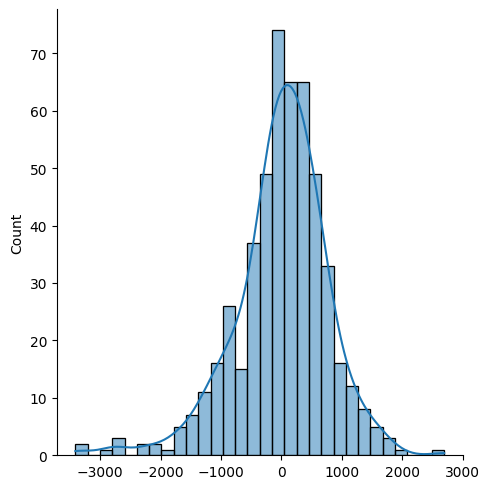

In [138]:
# Plot residuals with distribution plot
sns.displot(residuals, kde=True)
plt.show()

In [139]:
# Training set residuals are following normal distribution around mean 0

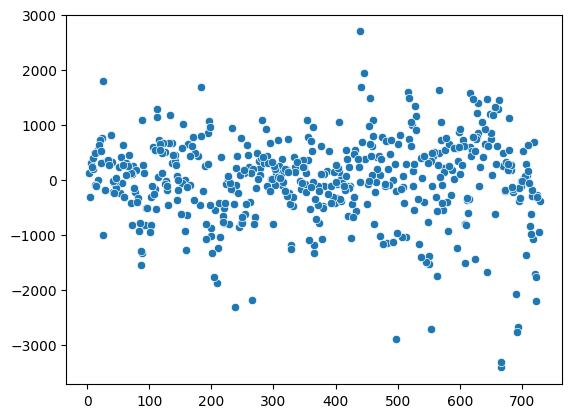

In [140]:
# Looking for residual patterns
sns.scatterplot(residuals)
plt.show()

In [141]:
# Patterns do not exist in residual plot

### Use Model to predict the Test set

In [142]:
residuals = test_out - X_test_pred

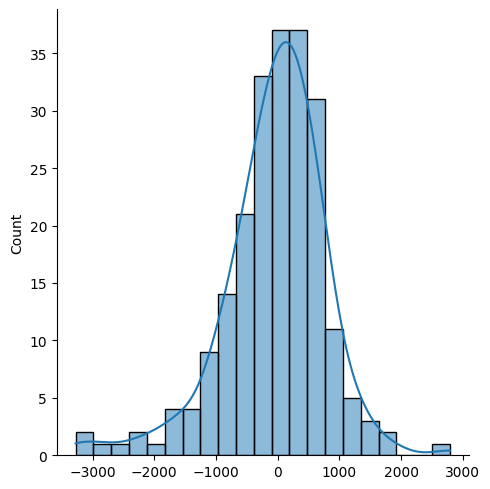

In [143]:
sns.displot(residuals, kde=True)
plt.show()

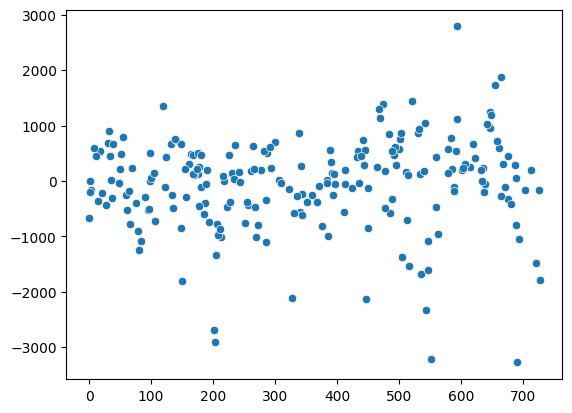

In [144]:
sns.scatterplot(residuals)
plt.show()

### R-squared

In [145]:
# R-squared value for test set
test_r2 = r2_score(y_true=test_out, y_pred=X_test_pred).round(2)
train_r2 = r2_score(y_true=train_out, y_pred=X_train_pred).round(2)

In [146]:
print('R-squared values')
print(f'Train set = {train_r2},\n Test set = {test_r2}')

R-squared values
Train set = 0.84,
 Test set = 0.81


In [147]:
mse_val = mean_squared_error(y_true=test_out, y_pred=X_test_pred).round(2)
print(f'mean square error = {mse_val}')

mean square error = 688010.42


## MODEL 2

In [148]:
# weekdays 'day_*' are being removed from hereon as they prove 
# to be higly collinear with other variables as shown in the above model analysis

In [149]:
X2_train_df = X_train_df.drop(['day_1', 'day_2', 'day_3', 'day_4', 'day_5', 'day_6'], axis=1)
chosen_features_2 = select_features(X2_train_df, train_out, 15)
X2_train = X_train_df[chosen_features_2]
X2_test = X_test_df[chosen_features_2]

In [150]:
chosen_features_2

Index(['year', 'holiday', 'atemp', 'humidity', 'windspeed', 'spring', 'winter',
       'light_rain', 'mist', 'dec', 'jul', 'mar', 'may', 'nov', 'sep'],
      dtype='object')

In [151]:
# STEP 1

In [152]:
X2_train_sm = sm.add_constant(X2_train)
X2_test_sm = sm.add_constant(X2_test)

In [153]:
model2 = create_models(X2_train_sm, X2_test_sm, train_out, 0)
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     170.5
Date:                Tue, 27 Aug 2024   Prob (F-statistic):          5.42e-184
Time:                        11:30:12   Log-Likelihood:                -4109.4
No. Observations:                 509   AIC:                             8251.
Df Residuals:                     493   BIC:                             8319.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2853.3322    236.436     12.068      0.000    2388.785    3317.879
year        1944.5820     71.356     27.252      0.000    1804.383    2084.781
holiday     -362.5233    224.218     -1.617      0.107    -803.063      78.017
atemp       4206.1749    288.874     14.561      0.000    3638.599    4773.751
humidity   -1434.2099    272.639     -5.260      0.000   -1969.887    -898.532
windspeed  -1270.4032    208.380     -6.097      0.000   -1679.826    -860.980
spring      -980.5340    139.528     -7.028      0.000   -1254.676    -706.392
winter       720.9629    129.678      5.560      0.000     466.173     975.753
light_rain -1690.4159    239.488     -7.058      0.000   -2160.959   -1219.873
mist        -386.1554     95.881     -4.027      0.000    -574.541    -197.770
dec         -258.8946    139.352     -1.858      0.064    -532.692      14.903
jul         -295.4544    147.592     -2.002      0.046    -585.441      -5.468
mar          450.5258    137.575      3.275      0.001     180.220     720.831
may          311.9577    147.002      2.122      0.034      23.130     600.786
nov         -325.2631    159.224     -2.043      0.042    -638.104     -12.422
sep          591.5600    137.174      4.312      0.000     322.042     861.078
==============================================================================
Omnibus:                       80.331   Durbin-Watson:                   1.926
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              191.526
Skew:                          -0.819   Prob(JB):                     2.57e-42
Kurtosis:                       5.520   Cond. No.                         16.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [154]:
get_VIF(X2_train_sm)

features    VIF
0        const  45.73
1        atemp   3.40
2       spring   2.98
3       winter   2.59
4     humidity   2.30
5          nov   1.70
6         mist   1.69
7   light_rain   1.51
8          jul   1.41
9          dec   1.38
10         may   1.25
11         sep   1.22
12   windspeed   1.21
13         mar   1.15
14        year   1.04
15     holiday   1.02

In [155]:
# STEP 2

In [156]:
model2 = create_models(X2_train_sm, X2_test_sm, train_out, 'holiday')
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     181.9
Date:                Tue, 27 Aug 2024   Prob (F-statistic):          1.44e-184
Time:                        11:30:12   Log-Likelihood:                -4110.8
No. Observations:                 509   AIC:                             8252.
Df Residuals:                     494   BIC:                             8315.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2851.6492    236.820     12.041      0.000    2386.351    3316.948
year        1938.2695     71.365     27.160      0.000    1798.053    2078.486
atemp       4216.0194    289.281     14.574      0.000    3647.646    4784.393
humidity   -1432.7719    273.083     -5.247      0.000   -1969.318    -896.225
windspeed  -1283.8228    208.555     -6.156      0.000   -1693.587    -874.059
spring      -989.2077    139.652     -7.083      0.000   -1263.593    -714.823
winter       722.2188    129.888      5.560      0.000     467.019     977.419
light_rain -1679.6826    239.787     -7.005      0.000   -2150.810   -1208.555
mist        -390.5881     95.998     -4.069      0.000    -579.203    -201.973
dec         -256.1438    139.569     -1.835      0.067    -530.367      18.079
jul         -310.1473    147.552     -2.102      0.036    -600.055     -20.240
mar          464.6398    137.522      3.379      0.001     194.440     734.840
may          316.4363    147.216      2.149      0.032      27.190     605.683
nov         -336.7175    159.326     -2.113      0.035    -649.757     -23.678
sep          577.8618    137.136      4.214      0.000     308.420     847.303
==============================================================================
Omnibus:                       79.597   Durbin-Watson:                   1.923
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              183.832
Skew:                          -0.823   Prob(JB):                     1.21e-40
Kurtosis:                       5.441   Cond. No.                         16.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [157]:
get_VIF(X2_train_sm)

features    VIF
0        const  45.73
1        atemp   3.40
2       spring   2.98
3       winter   2.59
4     humidity   2.30
5          nov   1.70
6         mist   1.69
7   light_rain   1.51
8          jul   1.40
9          dec   1.38
10         may   1.25
11         sep   1.21
12   windspeed   1.20
13         mar   1.14
14        year   1.04

In [158]:
# STEP 3

In [159]:
model2 = create_models(X2_train_sm, X2_test_sm, train_out, 'dec')
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     194.6
Date:                Tue, 27 Aug 2024   Prob (F-statistic):          5.39e-185
Time:                        11:30:13   Log-Likelihood:                -4112.5
No. Observations:                 509   AIC:                             8253.
Df Residuals:                     495   BIC:                             8312.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2797.0578    235.506     11.877      0.000    2334.344    3259.772
year        1933.6451     71.491     27.047      0.000    1793.182    2074.109
atemp       4326.6899    283.602     15.256      0.000    3769.478    4883.902
humidity   -1484.8461    272.253     -5.454      0.000   -2019.761    -949.932
windspeed  -1275.6854    209.006     -6.104      0.000   -1686.334    -865.037
spring      -986.0334    139.975     -7.044      0.000   -1261.052    -711.015
winter       656.3787    125.133      5.245      0.000     410.521     902.236
light_rain -1641.3801    239.447     -6.855      0.000   -2111.839   -1170.921
mist        -389.6060     96.226     -4.049      0.000    -578.668    -200.544
jul         -322.1230    147.760     -2.180      0.030    -612.437     -31.809
mar          498.5788    136.598      3.650      0.000     230.195     766.963
may          330.8798    147.357      2.245      0.025      41.358     620.402
nov         -233.6188    149.450     -1.563      0.119    -527.252      60.015
sep          602.2621    136.816      4.402      0.000     333.451     871.074
==============================================================================
Omnibus:                       76.031   Durbin-Watson:                   1.926
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              165.704
Skew:                          -0.809   Prob(JB):                     1.04e-36
Kurtosis:                       5.279   Cond. No.                         15.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [160]:
get_VIF(X2_train_sm)

features    VIF
0        const  45.01
1        atemp   3.25
2       spring   2.98
3       winter   2.39
4     humidity   2.28
5         mist   1.69
6   light_rain   1.50
7          nov   1.49
8          jul   1.40
9          may   1.25
10   windspeed   1.20
11         sep   1.20
12         mar   1.12
13        year   1.04

In [161]:
# STEP 4

In [162]:
model2 = create_models(X2_train_sm, X2_test_sm, train_out, 'nov')
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     210.1
Date:                Tue, 27 Aug 2024   Prob (F-statistic):          1.22e-185
Time:                        11:30:13   Log-Likelihood:                -4113.7
No. Observations:                 509   AIC:                             8253.
Df Residuals:                     496   BIC:                             8308.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2756.1879    234.390     11.759      0.000    2295.668    3216.708
year        1935.9598     71.580     27.046      0.000    1795.323    2076.597
atemp       4384.2334    281.612     15.568      0.000    3830.934    4937.533
humidity   -1481.2014    272.639     -5.433      0.000   -2016.871    -945.531
windspeed  -1292.2206    209.042     -6.182      0.000   -1702.937    -881.504
spring      -960.8392    139.246     -6.900      0.000   -1234.424    -687.254
winter       585.1613    116.714      5.014      0.000     355.846     814.476
light_rain -1638.4712    239.788     -6.833      0.000   -2109.597   -1167.345
mist        -376.5050     96.000     -3.922      0.000    -565.121    -187.889
jul         -328.2493    147.923     -2.219      0.027    -618.882     -37.616
mar          500.5445    136.791      3.659      0.000     231.783     769.306
may          332.1449    147.569      2.251      0.025      42.208     622.082
sep          617.6106    136.662      4.519      0.000     349.104     886.118
==============================================================================
Omnibus:                       73.732   Durbin-Watson:                   1.924
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              157.026
Skew:                          -0.795   Prob(JB):                     7.99e-35
Kurtosis:                       5.209   Cond. No.                         15.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [163]:
get_VIF(X2_train_sm)

features    VIF
0        const  44.45
1        atemp   3.20
2       spring   2.94
3     humidity   2.28
4       winter   2.07
5         mist   1.67
6   light_rain   1.50
7          jul   1.40
8          may   1.25
9    windspeed   1.20
10         sep   1.19
11         mar   1.12
12        year   1.04

### Model Evlauation and Prediction


In [164]:
X2_test_pred = model2.predict(X2_test_sm)
X2_train_pred = model2.predict(X2_train_sm)

#### Residual Analysis

In [165]:
# Error

In [166]:
residuals = train_out - X2_train_pred

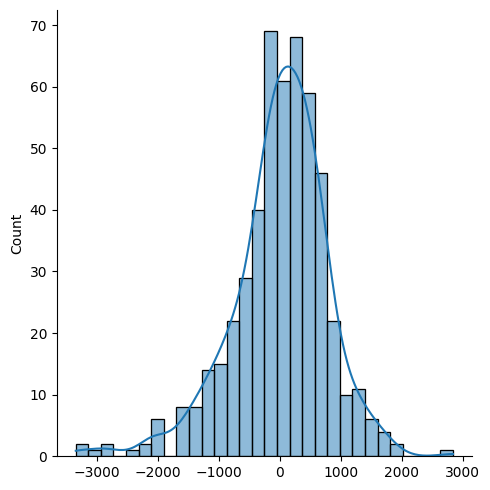

In [167]:
# Plot residuals with distribution plot
sns.displot(residuals, kde=True)
plt.show()

In [168]:
# Training set residuals are following normal distribution around mean 0

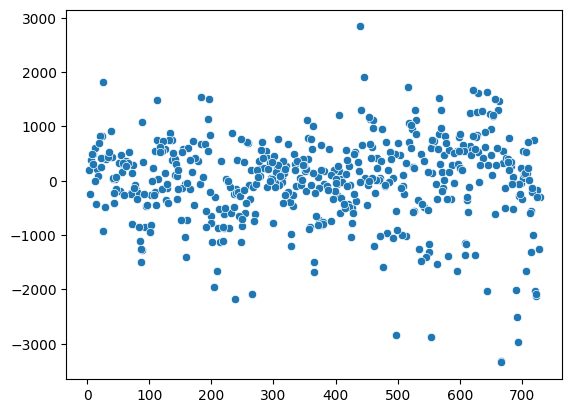

In [169]:
# Looking for residual patterns
sns.scatterplot(residuals)
plt.show()

In [170]:
# Patterns do not exist in residual plot

### Use Model to predict the Test set

In [171]:
residuals = test_out - X2_test_pred

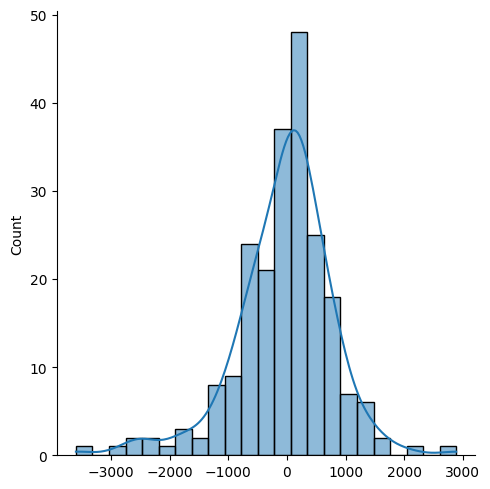

In [172]:
sns.displot(residuals, kde=True)
plt.show()

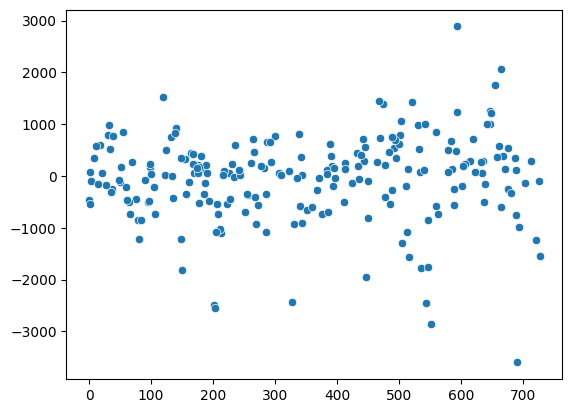

In [173]:
sns.scatterplot(residuals)
plt.show()

### R-squared

In [174]:
# R-squared value for test set
test_r2 = r2_score(y_true=test_out, y_pred=X2_test_pred).round(2)
train_r2 = r2_score(y_true=train_out, y_pred=X2_train_pred).round(2)

In [175]:
print('R-squared values')
print(f'Train set = {train_r2},\n Test set = {test_r2}')

R-squared values
Train set = 0.84,
 Test set = 0.82


In [176]:
mse_val = mean_squared_error(y_true=test_out, y_pred=X2_test_pred).round(2)
print(f'mean square error = {mse_val}')

mean square error = 681950.64


## MODEL 3

In [177]:
X3_train_df = X_train_df.drop(['day_1', 'day_2', 'day_3', 'day_4', 'day_5'], axis=1)

In [178]:
chosen_features_3 = select_features(X3_train_df, train_out, 10)
X3_train = X_train_df[chosen_features_3]
X3_test = X_test_df[chosen_features_3]

In [179]:
chosen_features_3

Index(['year', 'temp', 'atemp', 'humidity', 'windspeed', 'spring', 'winter',
       'light_rain', 'mar', 'sep'],
      dtype='object')

In [180]:
X3_train = X_train_df[chosen_features_3]
X3_test = X_test_df[chosen_features_3]

In [181]:
# STEP 1

In [182]:
X3_train_sm = sm.add_constant(X3_train)
X3_test_sm = sm.add_constant(X3_test)

In [183]:
model3 = create_models(X3_train_sm, X3_test_sm, train_out, 0)
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     236.7
Date:                Tue, 27 Aug 2024   Prob (F-statistic):          4.75e-182
Time:                        11:30:15   Log-Likelihood:                -4127.9
No. Observations:                 509   AIC:                             8278.
Df Residuals:                     498   BIC:                             8324.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2855.6262    245.645     11.625      0.000    2372.998    3338.255
year        1916.1473     73.253     26.158      0.000    1772.224    2060.071
temp       -2141.0546   1928.608     -1.110      0.267   -5930.265    1648.156
atemp       6672.1078   2124.872      3.140      0.002    2497.289    1.08e+04
humidity   -1985.8046    217.421     -9.133      0.000   -2412.981   -1558.629
windspeed  -1256.6234    219.714     -5.719      0.000   -1688.304    -824.943
spring      -998.7235    137.789     -7.248      0.000   -1269.444    -728.003
winter       565.8777    114.267      4.952      0.000     341.372     790.383
light_rain -1334.2623    223.860     -5.960      0.000   -1774.089    -894.436
mar          452.2392    139.569      3.240      0.001     178.023     726.455
sep          687.7343    134.116      5.128      0.000     424.230     951.238
==============================================================================
Omnibus:                       78.500   Durbin-Watson:                   1.948
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              156.628
Skew:                          -0.866   Prob(JB):                     9.74e-35
Kurtosis:                       5.094   Cond. No.                         124.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [184]:
get_VIF(X3_train_sm)

features     VIF
0        atemp  172.88
1         temp  172.72
2        const   46.37
3       spring    2.73
4       winter    1.89
5     humidity    1.38
6    windspeed    1.26
7   light_rain    1.24
8          mar    1.11
9          sep    1.09
10        year    1.03

In [185]:
# STEP 2

In [186]:
model3 = create_models(X3_train_sm, X3_test_sm, train_out, "temp")
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     262.7
Date:                Tue, 27 Aug 2024   Prob (F-statistic):          5.26e-183
Time:                        11:30:15   Log-Likelihood:                -4128.5
No. Observations:                 509   AIC:                             8277.
Df Residuals:                     499   BIC:                             8319.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2921.0893    238.518     12.247      0.000    2452.466    3389.713
year        1914.9429     73.262     26.138      0.000    1771.002    2058.884
atemp       4331.3285    263.209     16.456      0.000    3814.193    4848.464
humidity   -1958.3350    216.059     -9.064      0.000   -2382.832   -1533.838
windspeed  -1316.7095    212.993     -6.182      0.000   -1735.183    -898.236
spring      -993.9981    137.756     -7.216      0.000   -1264.651    -723.345
winter       587.4684    112.626      5.216      0.000     366.188     808.749
light_rain -1364.6031    222.237     -6.140      0.000   -1801.239    -927.967
mar          460.1004    139.421      3.300      0.001     186.175     734.026
sep          671.7688    133.374      5.037      0.000     409.725     933.813
==============================================================================
Omnibus:                       75.597   Durbin-Watson:                   1.948
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              147.893
Skew:                          -0.845   Prob(JB):                     7.68e-33
Kurtosis:                       5.030   Cond. No.                         14.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [187]:
get_VIF(X3_train_sm)

features    VIF
0       const  43.70
1      spring   2.73
2       atemp   2.65
3      winter   1.83
4    humidity   1.36
5  light_rain   1.22
6   windspeed   1.18
7         mar   1.11
8         sep   1.08
9        year   1.03

### Model Evlauation and Prediction


In [188]:
X3_test_pred = model3.predict(X3_test_sm)
X3_train_pred = model3.predict(X3_train_sm)

#### Residual Analysis

In [189]:
# Error

In [190]:
residuals = train_out - X3_train_pred

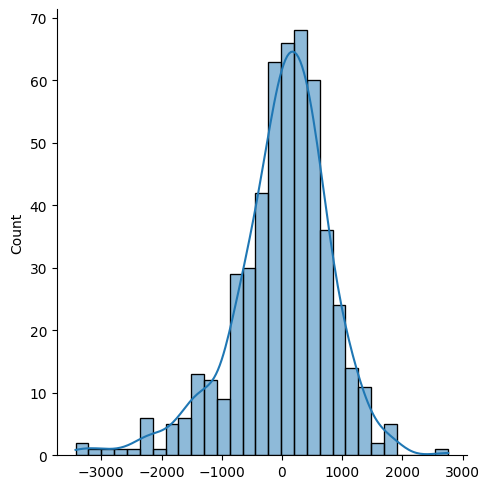

In [191]:
# Plot residuals with distribution plot
sns.displot(residuals, kde=True)
plt.show()

In [192]:
# Training set residuals are following normal distribution around mean 0

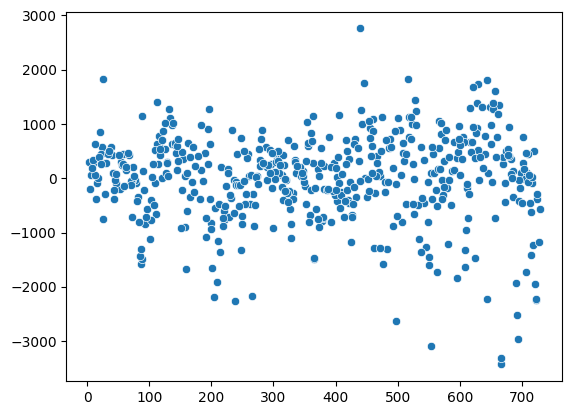

In [193]:
# Looking for residual patterns
sns.scatterplot(residuals)
plt.show()

In [194]:
# Patterns do not exist in residual plot

### Use Model to predict the Test set

In [195]:
residuals = test_out - X3_test_pred

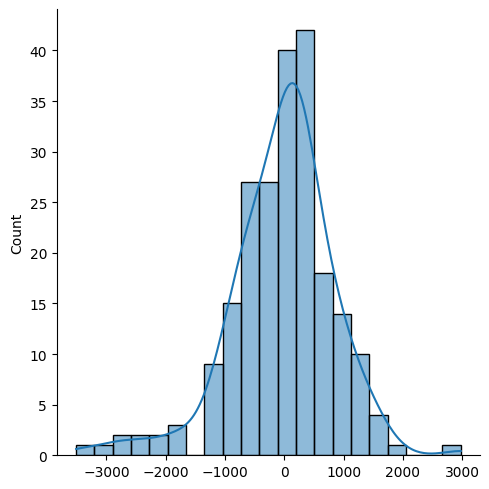

In [196]:
sns.displot(residuals, kde=True)
plt.show()

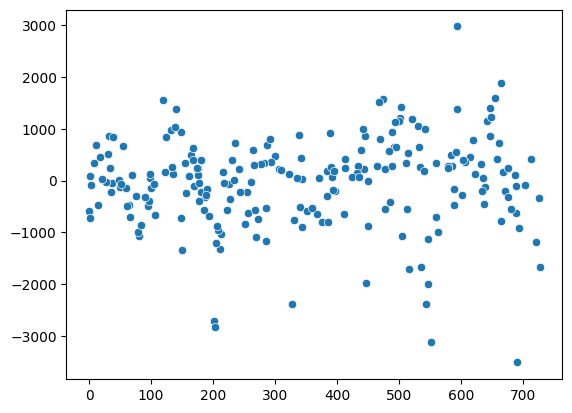

In [197]:
sns.scatterplot(residuals)
plt.show()

### R-squared


In [198]:
# R-squared value for test set
test_r2 = r2_score(y_true=test_out, y_pred=X3_test_pred).round(3)
train_r2 = r2_score(y_true=train_out, y_pred=X3_train_pred).round(3)

In [199]:
print('R-squared values')
print(f'Train set = {train_r2},\n Test set = {test_r2}')

R-squared values
Train set = 0.826,
 Test set = 0.798


In [200]:
mse_val = mean_squared_error(y_true=test_out, y_pred=X3_test_pred).round(2)
print(f'mean square error = {mse_val}')

mean square error = 748604.63


## CONCLUSION

 - Model 2 can be considered the final model
 - Difference in R-squared between train and test sets is least = 0.84 - 0.82 = 0.02
 - It also has the least mean square error among the three

#### Top factors that influence the model are 
- atemp has positive influence as increase in temperature increases the number of people using bikes with its positive coefficient
- both light_rain and humidity have the opposite effect influencing the bike usage negatively with coefficients being negative
- influence of the above two factor is multiplied by lower number of days for both with light_rain has very few as seen in EDA
- Year has a positive influence as the number of customers is increasing significantly year on year
- Registered customers number is increasing more than casual customers

#### Model is behaving according to the analysis done on the dataset